In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from random import randrange
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import log_loss
from datetime import datetime
import autosklearn.classification
from sklearn.metrics import ConfusionMatrixDisplay
from joblib import dump
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
import sys
sys.path.append('/home/krzysiek/drivendata/drivendata_competitions/functions')
from eda_automations import *
from sklearn.model_selection import train_test_split
import random as r
from statsmodels.distributions.empirical_distribution import ECDF
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('https://s3.amazonaws.com/drivendata/data/7/public/4910797b-ee55-40a7-8668-10efd5c1b960.csv')

In [3]:
df.head()

id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  \
0  34.938093  -9.856322                  none            0   
1  34.698766  -2.147466              Zahanati            0   
2  37.460664  -3.821329           Kwa Mahundi            0   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
4  31.130847  -1.825359               Shuleni            0   

                     basin  subvillage   region  region_code  district_code  \
0               Lake Nyasa    Mnyusi B   Iringa           11              5   
1            Lake Victoria     Nyamara     Mara           20              2   
2                  Pangani     Majengo  Manyara           21              4   
3  Ruvuma / Southern Coast  Mahakamani   Mtwara           90             63   
4            Lake Victoria  Kyanyamisa   Kagera           18              1   

         lga        ward  population public_meeting              recorded_by  \
0     Ludewa    Mundindi         109           True  GeoData Consultants Ltd   
1  Serengeti       Natta         280            NaN  GeoData Consultants Ltd   
2  Simanjiro     Ngorika         250           True  GeoData Consultants Ltd   
3   Nanyumbu    Nanyumbu          58           True  GeoData Consultants Ltd   
4    Karagwe  Nyakasimbi           0           True  GeoData Consultants Ltd   

  scheme_management                  scheme_name permit  construction_year  \
0               VWC                        Roman  False               1999   
1             Other                          NaN   True               2010   
2               VWC  Nyumba ya mungu pipe scheme   True               2009   
3               VWC                          NaN   True               1986   
4               NaN                          NaN   True                  0   

  extraction_type extraction_type_group extraction_type_class management  \
0         gravity               gravity               gravity        vwc   
1         gravity               gravity               gravity        wug   
2         gravity               gravity               gravity        vwc   
3     submersible           submersible           submersible        vwc   
4         gravity               gravity               gravity      other   

  management_group         payment payment_type water_quality quality_group  \
0       user-group    pay annually     annually          soft          good   
1       user-group       never pay    never pay          soft          good   
2       user-group  pay per bucket   per bucket          soft          good   
3       user-group       never pay    never pay          soft          good   
4            other       never pay    never pay          soft          good   

       quantity quantity_group                source           source_type  \
0        enough         enough                spring                spring   
1  insufficient   insufficient  rainwater harvesting  rainwater harvesting   
2        enough         enough                   dam                   dam   
3           dry            dry           machine dbh              borehole   
4      seasonal       seasonal  rainwater harvesting  rainwater harvesting   

  source_class              waterpoint_type waterpoint_type_group  
0  groundwater           communal standpipe    communal standpipe  
1      surface           communal standpipe    communal standpipe  
2      surface  communal standpipe multiple    communal standpipe  
3  groundwater  communal standpipe multiple    communal standpipe 

In [4]:
labels_data = pd.read_csv('https://github.com/KCristopher/drivendata_competitions/raw/main/data/training_set_labels.csv')

In [5]:
labels_data.head()

id    status_group
0  69572      functional
1   8776      functional
2  34310      functional
3  67743  non functional
4  19728      functional

The data contains the info about waterpoints in Tanzania. Each observations correspond to some waterpoint and is described in terms of the variables such as the height at which the waterpoint is located, type of source of the water (for example rain or spring) or the institution which built the well.  

We hope that we would be able to discern which waterponits are functional, which are not, and which needs to be repaired by examining the levels of all these different variables.

In [6]:
labels_data.index = labels_data['id']
del labels_data['id']

In [7]:
labels_data.head(3)

status_group
id                
69572   functional
8776    functional
34310   functional

In [8]:
y = labels_data.copy()
X = df.copy()

Splitting the data into training and testing sets :

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

<center>Exploring training data</center>

<center>Checking the general structure of the data, data types and  missing values :</center>

In [10]:
summarize_df(X_train)


Glance at the data : 



id  amount_tsh date_recorded      funder  gps_height installer  \
44928  31080         0.0    2012-10-10         Dwe           0    WEDECO   
31178  17282        50.0    2013-02-16       Jaica         -33     Tasaf   
9485   72545         0.0    2011-03-20         Dhv         298       DWE   
955    44490         0.0    2012-10-12       Rwssp           0     RWSSP   
29186  67816         5.0    2013-02-04  Ces (gmbh)        1088       DWE   

       longitude   latitude                 wpt_name  num_private  \
44928  33.179596  -4.214966                Hospitali            0   
31178  40.322805 -10.456297        Kwa Bakari Ismail            0   
9485   36.353508  -8.780099            Kwa Mgirigiti            0   
955    33.071249  -3.803178                   Ujamaa            0   
29186  37.271938  -3.283501  Kwa Richard Simon Chami            0   

                         basin  subvillage       region  region_code  \
44928                 Internal     Majengo       Tabora           14   
31178  Ruvuma / Southern Coast     Kipingo       Mtwara           99   
9485                    Rufiji  Kilungwili     Morogoro            5   
955              Lake Victoria      Busubi    Shinyanga           17   
29186                  Pangani      Muyuni  Kilimanjaro            3   

       district_code              lga         ward  population public_meeting  \
44928              1            Nzega  Nzega Urban           0          False   
31178              1     Mtwara Rural    Mahurunga        1000           True   
9485               4           Ulanga     Mtimbira           1           True   
955                3  Shinyanga Rural        Didia           0           True   
29186              4      Moshi Rural        Kindi          50           True   

                   recorded_by scheme_management                  scheme_name  \
44928  GeoData Consultants Ltd   Water authority        Kilimi and uchama dam   
31178  GeoData Consultants Ltd               VWC         Tangazo water supply   
9485   GeoData Consultants Ltd               NaN                          NaN   
955    GeoData Consultants Ltd               WUG                          NaN   
29186  GeoData Consultants Ltd       Water Board  Lyamungo umbwe water supply   

      permit  construction_year extraction_type extraction_type_group  \
44928   True                  0             ksb           submersible   
31178   True               2008     submersible           submersible   
9485    True               1991           other                 other   
955     True                  0           other                 other   
29186   True               2007         gravity               gravity   

      extraction_type_class       management management_group         payment  \
44928           submersible  water authority       commercial  pay per bucket   
31178           submersible              vwc       user-group  pay per bucket   
9485                  other              wug       user-group       never pay   
955                   other              wug       user-group       never pay   
29186               gravity      water board       user-group  pay per bucket   

      payment_type water_quality quality_group      quantity quantity_group  \
44928   per bucket      coloured       colored  insufficient   insufficient   
31178   per bucket         salty         salty        enough         enough   
9485     never pay          soft          good  insufficient   insufficient   
955      never pay          soft          good        enough         enough   
29186   per bucket          soft          good        enough         enough   

             source   source_type source_class              waterpoint_type  \
44928           dam           dam      surface                          dam   
31178   machine dbh      borehole  groundwater  communal standpipe multiple   
9485   shallow well  shallow well  groundwater                        other   
955    shallow


Data types, dimension of the data : 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53460 entries, 44928 to 56422
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     53460 non-null  int64  
 1   amount_tsh             53460 non-null  float64
 2   date_recorded          53460 non-null  object 
 3   funder                 50179 non-null  object 
 4   gps_height             53460 non-null  int64  
 5   installer              50160 non-null  object 
 6   longitude              53460 non-null  float64
 7   latitude               53460 non-null  float64
 8   wpt_name               53460 non-null  object 
 9   num_private            53460 non-null  int64  
 10  basin                  53460 non-null  object 
 11  subvillage             53132 non-null  object 
 12  region                 53460 non-null  object 
 13  region_code            53460 non-null  int64  
 14  district_co

None


Missing values across variables : 



scheme_name              25308
scheme_management         3468
installer                 3300
funder                    3281
public_meeting            2994
permit                    2754
subvillage                 328
management_group             0
waterpoint_type              0
extraction_type              0
extraction_type_group        0
source_class                 0
extraction_type_class        0
management                   0
source_type                  0
source                       0
payment_type                 0
water_quality                0
construction_year            0
quality_group                0
quantity                     0
quantity_group               0
payment                      0
id                           0
amount_tsh                   0
recorded_by                  0
population                   0
ward                         0
lga                          0
district_code                0
region_code                  0
region                       0
basin   


Missing values - % of the data : 


scheme_name              47.34
scheme_management         6.49
installer                 6.17
funder                    6.14
public_meeting            5.60
permit                    5.15
subvillage                0.61
management_group          0.00
waterpoint_type           0.00
extraction_type           0.00
extraction_type_group     0.00
source_class              0.00
extraction_type_class     0.00
management                0.00
source_type               0.00
source                    0.00
payment_type              0.00
water_quality             0.00
construction_year         0.00
quality_group             0.00
quantity                  0.00
quantity_group            0.00
payment                   0.00
id                        0.00
amount_tsh                0.00
recorded_by               0.00
population                0.00
ward                      0.00
lga                       0.00
district_code             0.00
region_code               0.00
region                    0.00
basin   

In [11]:
codes = [c for c in X_train.columns if 'code' in c]
codes

['region_code', 'district_code']

<center>Getting numeric summaries of the data</center>

In [12]:
summarize_numeric_data(X_train, exclude = ['id'] + codes)


The correlation between the variables in the dataset :



amount_tsh  gps_height  longitude  latitude  num_private  \
amount_tsh               1.00        0.08       0.02     -0.05         0.00   
gps_height               0.08        1.00       0.15     -0.04         0.01   
longitude                0.02        0.15       1.00     -0.43         0.02   
latitude                -0.05       -0.04      -0.43      1.00         0.01   
num_private              0.00        0.01       0.02      0.01         1.00   
population               0.01        0.13       0.09     -0.02         0.00   
construction_year        0.07        0.66       0.40     -0.25         0.03   

                   population  construction_year  
amount_tsh               0.01               0.07  
gps_height               0.13               0.66  
longitude                0.09               0.40  
latitude                -0.02              -0.25  
num_private              0.00               0.03  
population               1.00               0.26  
construction_year        0.26               1.00


Descriptive statistics of numeric data : 



amount_tsh  gps_height  longitude  latitude  num_private  population  \
count    53460.00    53460.00   53460.00  53460.00     53460.00    53460.00   
mean       316.23      669.11      34.09     -5.71         0.50      179.47   
std       3048.95      693.05       6.55      2.95        12.86      469.42   
min          0.00      -63.00       0.00    -11.65         0.00        0.00   
25%          0.00        0.00      33.09     -8.55         0.00        0.00   
50%          0.00      371.00      34.91     -5.02         0.00       25.00   
75%         20.00     1320.00      37.18     -3.33         0.00      215.00   
max     350000.00     2770.00      40.35     -0.00      1776.00    30500.00   

       construction_year  
count           53460.00  
mean             1303.02  
std               950.88  
min                 0.00  
25%                 0.00  
50%              1986.00  
75%              2004.00  
max              2013.00

In [13]:
look_at_variables_values(X_train)


Unique values from id, limited to 30

43306    25975
12073    44662
1615     23673
29454    34498
48691    33160
16619    66056
51171    25213
36142    39899
47219     9838
16557    50510
11112    59470
17875    62786
29394     7312
9593     55040
10609    34748
36226    24068
34046    66609
9980     43230
52560    44446
7841     15855
38900     9448
51970    42011
39917    62563
8128     48610
21964    60455
17809     7053
26595    64671
19019    20246
50693    62293
44465    54447
dtype: int64


Unique values from amount_tsh, limited to 30

66      6300.00
36      5500.00
61     70000.00
12      1500.00
39       700.00
43      2200.00
59    117000.00
7       1300.00
81        26.00
40     30000.00
71     26000.00
95      1400.00
54       150.00
60      7500.00
77      9000.00
11       500.00
58      7000.00
85         1.00
34         6.00
31      2500.00
75       800.00
30        15.00
14       600.00
93         0.25
80       306.00
46     25000.00
50      4700.00
76     60000.00
78

7              company
11               trust
6       other - school
3          water board
4     private operator
0      water authority
10               other
1                  vwc
2                  wug
9              unknown
5           parastatal
8                  wua
dtype: object


Unique values from management_group, limited to 30

2    parastatal
1    user-group
0    commercial
4       unknown
3         other
dtype: object


Unique values from payment, limited to 30

5              pay monthly
6                    other
3    pay when scheme fails
1                never pay
2                  unknown
4             pay annually
0           pay per bucket
dtype: object


Unique values from payment_type, limited to 30

3    on failure
6         other
1     never pay
5       monthly
4      annually
0    per bucket
2       unknown
dtype: object


Unique values from water_quality, limited to 30

1                 salty
6              fluoride
4       salty abandoned
2              

We can see that there is one entry of 0 in the column construction_year.

In [14]:
X_train[X_train.construction_year == 0].shape

(18575, 40)

In [15]:
X_train.columns.tolist()

['id',
 'amount_tsh',
 'date_recorded',
 'funder',
 'gps_height',
 'installer',
 'longitude',
 'latitude',
 'wpt_name',
 'num_private',
 'basin',
 'subvillage',
 'region',
 'region_code',
 'district_code',
 'lga',
 'ward',
 'population',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'construction_year',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

In [16]:
cols_subset = ['ward',
 'population',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'construction_year',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality']

In [17]:
X_train[X_train.construction_year == 0][cols_subset].sample(n = 100).head(50)

ward  population public_meeting              recorded_by  \
57137           Shigala           0           True  GeoData Consultants Ltd   
46024            Mwandu           0           True  GeoData Consultants Ltd   
41461            Uyumbu           0           True  GeoData Consultants Ltd   
38411            Mabira           0           True  GeoData Consultants Ltd   
46013           Kigongo           0           True  GeoData Consultants Ltd   
49860            Busole           0           True  GeoData Consultants Ltd   
39650           Lufingo           0           True  GeoData Consultants Ltd   
19101             Mkoka           0           True  GeoData Consultants Ltd   
53089            Salawe           0           True  GeoData Consultants Ltd   
8483        Mwamapalala           0          False  GeoData Consultants Ltd   
20383         Imalaseko           0           True  GeoData Consultants Ltd   
813           Missungwi           0           True  GeoData Consultants Ltd   
36753             Ilima           0           True  GeoData Consultants Ltd   
22151          Kwamtoro           0           True  GeoData Consultants Ltd   
26343            Busole           0           True  GeoData Consultants Ltd   
16118            Katoro           0           True  GeoData Consultants Ltd   
20501           Wangama          35           True  GeoData Consultants Ltd   
4414            Kibimba           0           True  GeoData Consultants Ltd   
55694         Ukenyenge           0          False  GeoData Consultants Ltd   
57527            Kulimi           0           True  GeoData Consultants Ltd   
12991           Lusungo           0           True  GeoData Consultants Ltd   
5527              Ikolo           0           True  GeoData Consultants Ltd   
15052            Lubiga           0           True  GeoData Consultants Ltd   
16899            Segala           0           True  GeoData Consultants Ltd   
6488               Jana           0           True  GeoData Consultants Ltd   
18944          Nyimbili           0           True  GeoData Consultants Ltd   
8328            Mtanana           0           True  GeoData Consultants Ltd   
41388            Rujewa           0          False  GeoData Consultants Ltd   
31255            Itinje           0           True  GeoData Consultants Ltd   
42197             Haubi           0           True  GeoData Consultants Ltd   
45242          Busilili           0           True  GeoData Consultants Ltd   
19042       Kalangalala           0           True  GeoData Consultants Ltd   
9743          Zongomera           0           True  GeoData Consultants Ltd   
35322         Malampaka           0           True  GeoData Consultants Ltd   
3602       Mwendakulima           0           True  GeoData Consultants Ltd   
57574            Ngenge           0           True  GeoData Consultants Ltd   
35519            Ilembo           0          False  GeoData Consultants Ltd   
39753          Mwaswale           0          False  GeoData Consultants Ltd   
19399             Massa           0           True  GeoData Consultants Ltd   
40650          Masumbwe           0            NaN  GeoData Consultants Ltd   
28612       Mkotokuyana         320           True  GeoData Consultants Ltd   
42046           Nshamba           0           True  GeoData Consultants Ltd   
48493     Kahamanhalaga           0          False  GeoData Consultants Ltd   
56902          Shishiyu           0           True  GeoData Consultants Ltd   
24815              Kagu           0           True  GeoData Consultants Ltd   
41983            Kisesa           0           True  GeoData Consultants Ltd   
3714           Msongola           1           True  GeoData Consultants Ltd   
18602             Mwagi           0           True  GeoData Consultants Ltd   
59111             Sakwe           0          False  GeoData Consultants Ltd   
22766  Biharamulo Urban           0           True  GeoData Consultan

In [18]:
def count_values(df, value):
    """
    Returns a pandas DataFrame with the names of the original features in the index and the number of
    occurrences of the value as the values of the first column and the same as the percentage of all
    observations in the second column.

    If the passed value is boolean, compares with boolean values in the DataFrame. If the passed value
    is a string, compares with object (string) values in the DataFrame. Otherwise, only compares with
    values of the same data type.

    Parameters:
    -----------
    df: pandas DataFrame.

    value : str / int / float / bool.
        The value to be counted.

    Returns:
    --------
    pandas DataFrame.
    """

    if isinstance(value, bool):
        value_mask = df.apply(lambda x: isinstance(x[0], bool), axis=0)
    elif isinstance(value, str):
        value_mask = df.dtypes == 'object'
    elif isinstance(value, int):
        value_mask = df.dtypes == 'int64'
    elif isinstance(value, float):
        value_mask = df.dtypes == 'float64'
    else:
        raise TypeError("Input value must be of type bool, str, int, or float.")

    count_series = df.loc[:, value_mask].eq(value).sum().sort_values(ascending=False)
    percent_series = count_series / len(df) * 100
    percent_series = percent_series.round(1)

    data = {
        f"Count of {value}": count_series,
        f"{value}'s as % of Total": percent_series
    }
    result_df = pd.DataFrame(data)
    result_df.index.name = 'Feature'
    result_df.sort_values(by=f"Count of {value}", ascending=False, inplace=True)

    return result_df[result_df['Count of {}'.format(value)] > 0]


In [19]:
X_train[['permit', 'scheme_management']]

permit scheme_management
44928   True   Water authority
31178   True               VWC
9485    True               NaN
955     True               WUG
29186   True       Water Board
...      ...               ...
54343   True       Water Board
38158  False               VWC
860    False  Private operator
15795   True               WUG
56422   True           Company

[53460 rows x 2 columns]

<center>Examining potentially not obvious missing values</center>

In [20]:
count_values(df = X_train, value = 0)

Count of 0  0's as % of Total
Feature                                         
num_private             52778               98.7
population              19189               35.9
construction_year       18575               34.7
gps_height              18313               34.3
district_code              22                0.0
id                          1                0.0

In [21]:
X_train.num_private.value_counts(normalize = True).round(3).head(3)

0    0.987
6    0.001
1    0.001
Name: num_private, dtype: float64

In [22]:
X_train[X_train.num_private == 0].sample(n = 10)

id  amount_tsh date_recorded                  funder  gps_height  \
44763  73724         0.0    2011-03-11      Private Individual         -13   
53373  44197       200.0    2013-02-26                     Snv         775   
44294  50908         0.0    2012-10-14  Government Of Tanzania           0   
54278  69311         0.0    2012-10-23            World Vision           0   
50212  50969         0.0    2011-07-19      Plan International           0   
24002  16076         0.0    2011-03-07                   Schoo           0   
54565  52495        50.0    2011-02-27                 Private          44   
33187  21636        50.0    2013-03-21                       0          20   
29835  51007         0.0    2013-03-26            World Vision        1753   
24767  52572         0.0    2013-03-14                     NaN        1316   

               installer  longitude      latitude            wpt_name  \
44763      Athumani Issa  38.890431 -5.716242e+00   Kwa Athumani Issa   
53373                DWE  36.089157 -1.093353e+01         Kwa Geofrey   
44294         Government  33.196050 -3.743630e+00          Iligwamabu   
54278       World vision  32.247985 -3.379701e+00         Changamkeni   
50212  Plan Internationa   0.000000 -2.000000e-08             Bombani   
24002              TANAS  35.847007 -6.344766e+00             Schools   
54565            private  39.308076 -6.977642e+00         Kwa Kitandu   
33187                  0  39.211342 -6.902199e+00  Kwa Fundi Baiskeli   
29835                DWE  36.647320 -3.264226e+00       Kwa Loinyakwa   
24767                NaN  36.744370 -3.403252e+00              Pekasi   

       num_private                    basin            subvillage  \
44763            0                  Pangani             Sange Kuu   
53373            0  Ruvuma / Southern Coast               Chiwata   
44294            0                 Internal                Nhundi   
54278            0          Lake Tanganyika           Itindambogo   
50212            0            Lake Victoria               Mbugani   
24002            0                   Rufiji               Nyerere   
54565            0              Wami / Ruvu              Chatembo   
33187            0              Wami / Ruvu  Mtaa Wa Kitunda Kati   
29835            0                  Pangani                Matini   
24767            0                  Pangani      Tanganyika Pekas   

              region  region_code  district_code              lga  \
44763          Tanga            4              5          Pangani   
53373         Ruvuma           10              5         Namtumbo   
44294      Shinyanga           17              3  Shinyanga Rural   
54278      Shinyanga           17              5          Bukombe   
50212         Mwanza           19              6            Geita   
24002         Dodoma            1              4         Chamwino   
54565          Pwani           60             43         Mkuranga   
33187  Dar es Salaam            7              2            Ilala   
29835         Arusha            2              2     Arusha Rural   
24767         Arusha            2              3     Arusha Rural   

               ward  population public_meeting              recorded_by  \
44763        Mkwaja         620           True  GeoData Consultants Ltd   
53373        Ligera         420           True  GeoData Consultants Ltd   
44294         Usule           0           True  GeoData Consultants Ltd   
54278      Ushirika           0           True  GeoData Consultants Ltd   
50212   Kalangalala           0           True  GeoData Consultants Ltd   
24002  Mvumi Makulu           0           True  GeoData Consultants Ltd   
54565       Vikindu         735           True  GeoData Consultants Ltd   
33187       Kitunda         200            NaN  GeoData Consultants Ltd   
29835      Olkokola         150           True  GeoData Consultants Ltd   
24767       Moshono           1          False  GeoData Consultants Ltd   

 

Regardless whether num_private, for which description is not available, can really be 0 or it is a missing value, we can safely remove it, because the feature which has the same value in 99 % of cases wouldn't be very useful anyway. There is a big chance that t is a missing value, too.

In [23]:
del X_train['num_private']

In [24]:
X_train.head(2)

id  amount_tsh date_recorded funder  gps_height installer  \
44928  31080         0.0    2012-10-10    Dwe           0    WEDECO   
31178  17282        50.0    2013-02-16  Jaica         -33     Tasaf   

       longitude   latitude           wpt_name                    basin  \
44928  33.179596  -4.214966          Hospitali                 Internal   
31178  40.322805 -10.456297  Kwa Bakari Ismail  Ruvuma / Southern Coast   

      subvillage  region  region_code  district_code           lga  \
44928    Majengo  Tabora           14              1         Nzega   
31178    Kipingo  Mtwara           99              1  Mtwara Rural   

              ward  population public_meeting              recorded_by  \
44928  Nzega Urban           0          False  GeoData Consultants Ltd   
31178    Mahurunga        1000           True  GeoData Consultants Ltd   

      scheme_management            scheme_name permit  construction_year  \
44928   Water authority  Kilimi and uchama dam   True                  0   
31178               VWC   Tangazo water supply   True               2008   

      extraction_type extraction_type_group extraction_type_class  \
44928             ksb           submersible           submersible   
31178     submersible           submersible           submersible   

            management management_group         payment payment_type  \
44928  water authority       commercial  pay per bucket   per bucket   
31178              vwc       user-group  pay per bucket   per bucket   

      water_quality quality_group      quantity quantity_group       source  \
44928      coloured       colored  insufficient   insufficient          dam   
31178         salty         salty        enough         enough  machine dbh   

      source_type source_class              waterpoint_type  \
44928         dam      surface                          dam   
31178    borehole  groundwater  communal standpipe multiple   

      waterpoint_type_group  
44928                   dam  
31178    communal standpipe

In [25]:
count_values(df = X_train, value = '-')

Count of -  -'s as % of Total
Feature                                 
installer           3                0.0

In [26]:
X_train[X_train.installer == '-']

id  amount_tsh date_recorded                  funder  gps_height  \
10217  42616         0.0    2011-08-03         Kalebejo Parish           0   
25769  21336         0.0    2011-07-26  Government Of Tanzania           0   
20968  10873         0.0    2011-07-26  Government Of Tanzania           0   

      installer  longitude  latitude         wpt_name          basin  \
10217         -  32.356645 -2.499427  Kalebejo Parish  Lake Victoria   
25769         -  32.674665 -2.506721    Health Center  Lake Victoria   
20968         -  32.677150 -2.508912     Kwa Madebele  Lake Victoria   

             subvillage  region  region_code  district_code        lga  \
10217        Nyang'Ombe  Mwanza           19              5  Sengerema   
25769  Katungulu Center  Mwanza           19              5  Sengerema   
20968  Katungulu Center  Mwanza           19              5  Sengerema   

            ward  population public_meeting              recorded_by  \
10217   Kalebezo           0            NaN  GeoData Consultants Ltd   
25769  Katunguru           0           True  GeoData Consultants Ltd   
20968  Katunguru           0           True  GeoData Consultants Ltd   

      scheme_management                scheme_name permit  construction_year  \
10217  Private operator                       None   True                  0   
25769               VWC  water supply in katungulu   True                  0   
20968               VWC     water supply Katungulu   True                  0   

      extraction_type extraction_type_group extraction_type_class  \
10217          swn 80                swn 80              handpump   
25769           other                 other                 other   
20968           other                 other                 other   

             management management_group         payment payment_type  \
10217  private operator       commercial       never pay    never pay   
25769               vwc       user-group  pay per bucket   per bucket   
20968               vwc       user-group  pay per bucket   per bucket   

         water_quality quality_group      quantity quantity_group  \
10217  salty abandoned         salty  insufficient   insufficient   
25769             soft          good        enough         enough   
20968             soft          good        enough         enough   

             source   source_type source_class     waterpoint_type  \
10217  shallow well  shallow well  groundwater           hand pump   
25769          lake    river/lake      surface  communal standpipe   
20968          lake    river/lake      surface  communal standpipe   

      waterpoint_type_group  
10217             hand pump  
25769    communal standpipe  
20968    communal standpipe

hyphens ('-') must represent NaNs.

In [27]:
X_train.loc[X_train.installer == '-' , 'installer'] = np.nan

In [28]:
X_train[X_train.installer == '-']

Empty DataFrame
Columns: [id, amount_tsh, date_recorded, funder, gps_height, installer, longitude, latitude, wpt_name, basin, subvillage, region, region_code, district_code, lga, ward, population, public_meeting, recorded_by, scheme_management, scheme_name, permit, construction_year, extraction_type, extraction_type_group, extraction_type_class, management, management_group, payment, payment_type, water_quality, quality_group, quantity, quantity_group, source, source_type, source_class, waterpoint_type, waterpoint_type_group]
Index: []

In [29]:
X_train.shape

(53460, 39)

In [30]:
X_train[X_train.population == 0]

id  amount_tsh date_recorded                  funder  gps_height  \
44928  31080         0.0    2012-10-10                     Dwe           0   
955    44490         0.0    2012-10-12                   Rwssp           0   
11376  12282         0.0    2011-08-07  Government Of Tanzania           0   
41084   4136         0.0    2011-03-30                     NaN           0   
13035  57121         0.0    2011-08-27                  Hesawa           0   
...      ...         ...           ...                     ...         ...   
41090  50530         0.0    2011-03-24              World Bank           0   
44131   5457         0.0    2011-03-14                     Bsf           0   
37194  73111         0.0    2011-02-26                    Kkkt        1922   
6265   47858         0.0    2011-03-10                     Bsf           0   
15795  49444         0.0    2012-10-31                   Rwssp           0   

        installer  longitude      latitude         wpt_name          basin  \
44928      WEDECO  33.179596 -4.214966e+00        Hospitali       Internal   
955         RWSSP  33.071249 -3.803178e+00           Ujamaa  Lake Victoria   
11376  Government   0.000000 -2.000000e-08          Bombani  Lake Victoria   
41084         NaN  33.037957 -9.365355e+00       Tingatinga     Lake Nyasa   
13035         DWE  33.572619 -2.694380e+00    Kwashilangila  Lake Victoria   
...           ...        ...           ...              ...            ...   
41090       Inter  36.644403 -6.249858e+00  Kwa John Makago    Wami / Ruvu   
44131         DWE  35.238399 -5.172737e+00        Machineni       Internal   
37194       Commu  34.230959 -9.369277e+00             none     Lake Nyasa   
6265         Gove  35.547568 -6.336433e+00           Mnadan       Internal   
15795      WEDECO  34.316586 -3.107161e+00         Muungano  Lake Victoria   

      subvillage     region  region_code  district_code              lga  \
44928    Majengo     Tabora           14              1            Nzega   
955       Busubi  Shinyanga           17              3  Shinyanga Rural   
11376   K/Center     Mwanza           19              6            Geita   
41084      Ibana      Mbeya           12              5            Ileje   
13035     Makala     Mwanza           19              2           Kwimba   
...          ...        ...          ...            ...              ...   
41090        NaN     Dodoma            1              3           Kongwa   
44131  Kilimba B     Dodoma            1              1           Kondoa   
37194  Ikonda Bo     Iringa           11              3           Makete   
6265      Kikuyu     Dodoma            1              6             Bahi   
15795     Ijosho  Shinyanga           17              6            Meatu   

              ward  population public_meeting              recorded_by  \
44928  Nzega Urban           0          False  GeoData Consultants Ltd   
955          Didia           0           True  GeoData Consultants Ltd   
11376       Kakora           0           True  GeoData Consultants Ltd   
41084      Chitete           0           True  GeoData Consultants Ltd   
13035        Iseni           0           True  GeoData Consultants Ltd   
...            ...         ...            ...                      ...   
41090         Iduo           0           True  GeoData Consultants Ltd   
44131        Ovada           0           True  GeoData Consultants Ltd   
37194     Lupalilo           0           True  GeoData Consultants Ltd   
6265       Ibugule           0           True  GeoData Consultants Ltd   
15795     Sakasaka           0           True  GeoData Consultants Ltd   

      scheme_management            scheme_name permit  construction_year  \
44928   Water authority  Kilimi and uchama dam   True                  0   
955                 WUG                    NaN   True                  0   
11376               VWC             Nyamtukuza   True                  0   
41084               VWC       

In [31]:
X_train.loc[ : , 'exact_location'] = [(long, lat) for long, lat in zip(X_train.longitude, X_train.latitude)]

/tmp/ipykernel_381/888980537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[ : , 'exact_location'] = [(long, lat) for long, lat in zip(X_train.longitude, X_train.latitude)]


In [32]:
X_train.sample(n = 1000).groupby('exact_location')['population'].unique()

exact_location
(0.0, -2e-08)                            [0]
(29.64546028, -4.76836456)             [210]
(29.69377049, -4.91313741)            [1450]
(29.70131084, -4.85184416)             [250]
(29.72886092, -4.79230023)             [500]
                                       ...  
(40.14599361, -10.30986285)            [320]
(40.18687332, -10.281623800000002)     [650]
(40.19368313, -10.28811044)            [410]
(40.27913624, -10.5360558)             [400]
(40.28204484, -10.39115126)           [1000]
Name: population, Length: 980, dtype: object

In [33]:
(X_train.sample(n = 1000).groupby('exact_location')['population'].nunique() == 1).all()

True

Out of 1000 random locations, each location with the same coordinates had the same population, which mean that there are no apparent isses whith the quality of population data.

In [34]:
del X_train['exact_location']

In [35]:
X_train.sample(n = 1000).groupby('subvillage')['population'].unique().head(60)

subvillage
Amani                             [1]
Ayamaami                        [212]
Bambalaga                       [315]
Bapulo                          [600]
Barabara 1                      [250]
Barabara 2                        [1]
Barabara 4                       [80]
Barabara 8                       [20]
Barabarani                       [30]
Bariadi                           [0]
Basodagaw                       [256]
Bawa A                            [1]
Baweni                          [200]
Berlingi                          [0]
Besurura                         [50]
Bichande                        [350]
Bigabilo A                      [566]
Bilatenda                       [850]
Bisinge                         [195]
Bitale Shule                    [352]
Biturana Shuleni          [1500, 350]
Bolelo                          [144]
Bomani                          [200]
Bondeni                      [530, 1]
Bondo                           [185]
Bubale                            [0]
B

Population refers to population around the well, so we might have multiple values of population in a ward or even in subvillage. Browsing for sample villages with zero poplation in the Web we find that in fact they do have a population, which makes sense, since there is little incentive to build a well for some lone wanderers in uninhabited places..

In [36]:
X_train.loc[X_train.population == 0, 'population'] = np.nan

In [37]:
X_train.population.isnull().sum()

19189

In [38]:
X_train.head(2)

id  amount_tsh date_recorded funder  gps_height installer  \
44928  31080         0.0    2012-10-10    Dwe           0    WEDECO   
31178  17282        50.0    2013-02-16  Jaica         -33     Tasaf   

       longitude   latitude           wpt_name                    basin  \
44928  33.179596  -4.214966          Hospitali                 Internal   
31178  40.322805 -10.456297  Kwa Bakari Ismail  Ruvuma / Southern Coast   

      subvillage  region  region_code  district_code           lga  \
44928    Majengo  Tabora           14              1         Nzega   
31178    Kipingo  Mtwara           99              1  Mtwara Rural   

              ward  population public_meeting              recorded_by  \
44928  Nzega Urban         NaN          False  GeoData Consultants Ltd   
31178    Mahurunga      1000.0           True  GeoData Consultants Ltd   

      scheme_management            scheme_name permit  construction_year  \
44928   Water authority  Kilimi and uchama dam   True                  0   
31178               VWC   Tangazo water supply   True               2008   

      extraction_type extraction_type_group extraction_type_class  \
44928             ksb           submersible           submersible   
31178     submersible           submersible           submersible   

            management management_group         payment payment_type  \
44928  water authority       commercial  pay per bucket   per bucket   
31178              vwc       user-group  pay per bucket   per bucket   

      water_quality quality_group      quantity quantity_group       source  \
44928      coloured       colored  insufficient   insufficient          dam   
31178         salty         salty        enough         enough  machine dbh   

      source_type source_class              waterpoint_type  \
44928         dam      surface                          dam   
31178    borehole  groundwater  communal standpipe multiple   

      waterpoint_type_group  
44928                   dam  
31178    communal standpipe

In [39]:
(X_train.isnull().sum().sort_values(ascending = False) / len(X_train)).round(2).head(10)

scheme_name              0.47
population               0.36
scheme_management        0.06
installer                0.06
funder                   0.06
public_meeting           0.06
permit                   0.05
subvillage               0.01
payment_type             0.00
extraction_type_class    0.00
dtype: float64

In [40]:
count_values(df = X_train, value = 0)

Count of 0  0's as % of Total
Feature                                         
construction_year       18575               34.7
gps_height              18313               34.3
district_code              22                0.0
id                          1                0.0

In [41]:
X_train.construction_year.describe().round(2)

count    53460.00
mean      1303.02
std        950.88
min          0.00
25%          0.00
50%       1986.00
75%       2004.00
max       2013.00
Name: construction_year, dtype: float64

We can see that the 0 entries skew the mean value of the construction_year downwards, so that the average construction year is 1300, which is not a very probable value.

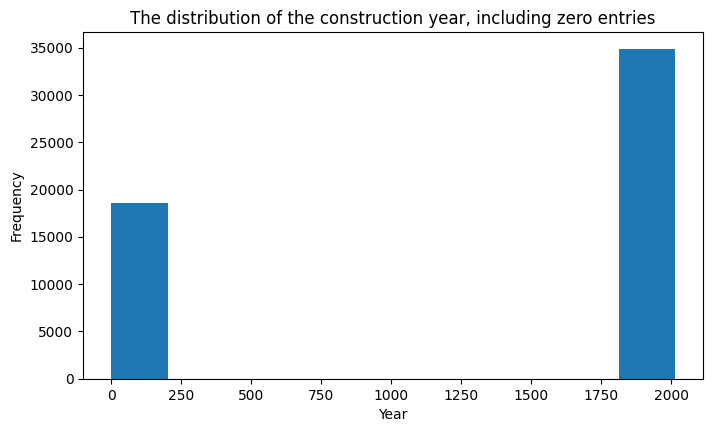

In [42]:
X_train.construction_year.plot.hist(figsize = (8, 4.5))
plt.title('The distribution of the construction year, including zero entries')
plt.xlabel('Year')
plt.show()

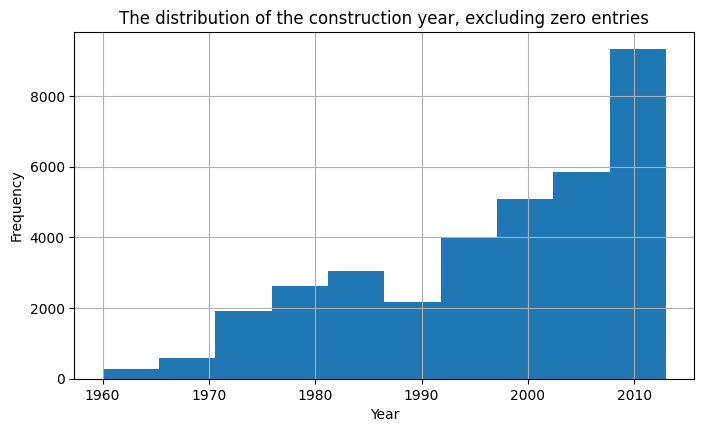

In [43]:
X_train[X_train.construction_year != 0].construction_year.plot.hist(figsize = (8, 4.5))
plt.title('The distribution of the construction year, excluding zero entries')
plt.xlabel('Year')
plt.grid()
plt.show()

In [44]:
ecdf = ECDF(X_train[X_train.construction_year != 0].construction_year)

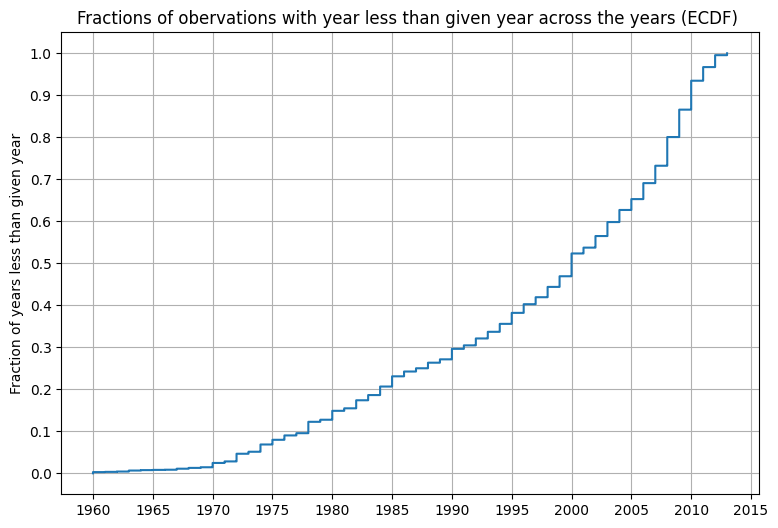

In [45]:
plt.figure(figsize = (9, 6))
plt.step(ecdf.x, ecdf.y)
plt.grid()
plt.yticks([i / 10 for i in range(11)])
plt.xticks([*range(1960, 2020, 5)])
plt.title('Fractions of obervations with year less than given year across the years (ECDF) ')
plt.ylabel('Fraction of years less than given year')
plt.show()

In [46]:
X_train[X_train.construction_year != 0].construction_year.describe().round(2)

count    34885.00
mean      1996.84
std         12.48
min       1960.00
25%       1988.00
50%       2000.00
75%       2008.00
max       2013.00
Name: construction_year, dtype: float64

In [47]:
cv_coef = round(12.48 / 1996.84, 2)
cv_coef

0.01

In [48]:
X_train.construction_year.isnull().sum()

0

In [49]:
X_train.loc[X_train.construction_year == 0, 'construction_year'] = np.nan

In [50]:
X_train.construction_year.isnull().sum()

18575

The mean value of non-zero entries in construction_year -  1997 would seem to be a good candidate for the imputed value of the NaNs in year.
It's close to the median and there is little variation in this data. Since there are no outliers and the sample mean is an unbiased estmiator of the population mean, it's better to choose the mean over the median for imputing missing values.

In [51]:
count_values(df = X_train, value = 0)

Count of 0  0's as % of Total
Feature                                     
gps_height          18313               34.3
district_code          22                0.0
id                      1                0.0

In [52]:
X_train[X_train.gps_height == 0]

id  amount_tsh date_recorded                  funder  gps_height  \
44928  31080         0.0    2012-10-10                     Dwe           0   
955    44490         0.0    2012-10-12                   Rwssp           0   
46076  37560         0.0    2011-03-15     Mkinga Distric Coun           0   
11376  12282         0.0    2011-08-07  Government Of Tanzania           0   
41084   4136         0.0    2011-03-30                     NaN           0   
...      ...         ...           ...                     ...         ...   
41090  50530         0.0    2011-03-24              World Bank           0   
44131   5457         0.0    2011-03-14                     Bsf           0   
16850  45990        10.0    2011-04-02             Quick Wings           0   
6265   47858         0.0    2011-03-10                     Bsf           0   
15795  49444         0.0    2012-10-31                   Rwssp           0   

                 installer  longitude      latitude         wpt_name  \
44928               WEDECO  33.179596 -4.214966e+00        Hospitali   
955                  RWSSP  33.071249 -3.803178e+00           Ujamaa   
46076                  DWE  38.768891 -4.751313e+00   Shabani Wambua   
11376           Government   0.000000 -2.000000e-08          Bombani   
41084                  NaN  33.037957 -9.365355e+00       Tingatinga   
...                    ...        ...           ...              ...   
41090                Inter  36.644403 -6.249858e+00  Kwa John Makago   
44131                  DWE  35.238399 -5.172737e+00        Machineni   
16850  Korogwe water works  38.466952 -5.172985e+00         Kanisani   
6265                  Gove  35.547568 -6.336433e+00           Mnadan   
15795               WEDECO  34.316586 -3.107161e+00         Muungano   

               basin subvillage     region  region_code  district_code  \
44928       Internal    Majengo     Tabora           14              1   
955    Lake Victoria     Busubi  Shinyanga           17              3   
46076        Pangani  Kibaoni B      Tanga            4              8   
11376  Lake Victoria   K/Center     Mwanza           19              6   
41084     Lake Nyasa      Ibana      Mbeya           12              5   
...              ...        ...        ...          ...            ...   
41090    Wami / Ruvu        NaN     Dodoma            1              3   
44131       Internal  Kilimba B     Dodoma            1              1   
16850        Pangani    Manzese      Tanga            4              2   
6265        Internal     Kikuyu     Dodoma            1              6   
15795  Lake Victoria     Ijosho  Shinyanga           17              6   

                   lga         ward  population public_meeting  \
44928            Nzega  Nzega Urban         NaN          False   
955    Shinyanga Rural        Didia         NaN           True   
46076           Mkinga       Daluni       400.0           True   
11376            Geita       Kakora         NaN           True   
41084            Ileje      Chitete         NaN           True   
...                ...          ...         ...            ...   
41090           Kongwa         Iduo         NaN           True   
44131           Kondoa        Ovada         NaN           True   
16850          Korogwe      Korogwe      1000.0           True   
6265              Bahi      Ibugule         NaN           True   
15795            Meatu     Sakasaka         NaN           True   

                   recorded_by scheme_management            scheme_name  \
44928  GeoData Consultants Ltd   Water authority  Kilimi and uchama dam   
955    GeoData Consultants Ltd               WUG                    NaN   
46076  GeoData Consultants Ltd               VWC   Kigongoi gravity wat   
11376  GeoData Consultants Ltd               VWC             Nyamtukuza   
41084  GeoData Consultants Ltd               VWC                    NaN   
...                        ...               ...                    ...   
4

The zeros in gps_height are not actual values - for example ward Kakora has an elevation of 1200 m, not 0 m
(https://elevationmap.net/kakora-nyang-wale-tz-1012568019). The zeros represents missing values.

In [53]:
X_train.loc[X_train.gps_height == 0, 'gps_height'] = np.nan

In [54]:
X_train.gps_height.isnull().sum()

18313

In [55]:
X_train[X_train.district_code == 0].groupby('ward').size()

ward
Gode Gode     5
Matomondo    17
dtype: int64

In [56]:
X_train.ward.value_counts()

Igosi               276
Imalinyi            223
Siha Kati           212
Mdandu              206
Nduruma             190
                   ... 
Mwanga Kaskazini      1
Ifinga                1
Chinugulu             1
Kapilula              1
Mkumbi                1
Name: ward, Length: 2089, dtype: int64

In [57]:
X_train[(X_train.district_code != 0) & (X_train.ward.isin(['Gode Gode', 'Matomondo']))]

Empty DataFrame
Columns: [id, amount_tsh, date_recorded, funder, gps_height, installer, longitude, latitude, wpt_name, basin, subvillage, region, region_code, district_code, lga, ward, population, public_meeting, recorded_by, scheme_management, scheme_name, permit, construction_year, extraction_type, extraction_type_group, extraction_type_class, management, management_group, payment, payment_type, water_quality, quality_group, quantity, quantity_group, source, source_type, source_class, waterpoint_type, waterpoint_type_group]
Index: []

In [58]:
X_train[X_train.district_code == 0].groupby('region').size()

region
Dodoma    22
dtype: int64

In [59]:
X_train[X_train.district_code == 0].groupby(['region', 'ward', 'subvillage']).size()

region  ward       subvillage  
Dodoma  Gode Gode  Chamwino A      2
                   Chang'Ombe      1
                   Ng'Ambo         2
        Matomondo  Bondeni         2
                   Ikulu           2
                   Kaloleni B      2
                   Majengo         1
                   Mangwe          2
                   Manyata         1
                   Mbuyuni         2
                   Misheni         1
                   Misheni B       1
                   Msunjilile      1
                   Sangandunghu    1
                   Shuleni         1
dtype: int64

There is just no district code data for couple of villages in Gode Gode and Matomondo wards.

In [60]:
X_train.loc[X_train.district_code == 0, 'district_code'] = np.nan

In [61]:
X_train.district_code.isnull().sum()

22

In [62]:
count_values(df = X_train, value = 0)

Count of 0  0's as % of Total
Feature                               
id                1                0.0

In [63]:
(X_train.isnull().sum().sort_values(ascending = False) / len(X_train)).round(2).head(10)

scheme_name          0.47
population           0.36
construction_year    0.35
gps_height           0.34
scheme_management    0.06
installer            0.06
funder               0.06
public_meeting       0.06
permit               0.05
subvillage           0.01
dtype: float64

In [64]:
len(X_train) == len(y_train)

True

In [65]:
X_train.index

Int64Index([44928, 31178,  9485,   955, 29186, 46076, 11376, 41084, 46319,
            39251,
            ...
            16850,  6265, 54886, 11284, 44732, 54343, 38158,   860, 15795,
            56422],
           dtype='int64', length=53460)

In [66]:
y_train.index

Int64Index([31080, 17282, 72545, 44490, 67816, 37560, 12282,  4136, 40776,
            61121,
            ...
            45990, 47858, 15504, 46009, 51225, 68525, 11980, 35778, 49444,
            23812],
           dtype='int64', name='id', length=53460)

In [67]:
X_train.head()

id  amount_tsh date_recorded      funder  gps_height installer  \
44928  31080         0.0    2012-10-10         Dwe         NaN    WEDECO   
31178  17282        50.0    2013-02-16       Jaica       -33.0     Tasaf   
9485   72545         0.0    2011-03-20         Dhv       298.0       DWE   
955    44490         0.0    2012-10-12       Rwssp         NaN     RWSSP   
29186  67816         5.0    2013-02-04  Ces (gmbh)      1088.0       DWE   

       longitude   latitude                 wpt_name                    basin  \
44928  33.179596  -4.214966                Hospitali                 Internal   
31178  40.322805 -10.456297        Kwa Bakari Ismail  Ruvuma / Southern Coast   
9485   36.353508  -8.780099            Kwa Mgirigiti                   Rufiji   
955    33.071249  -3.803178                   Ujamaa            Lake Victoria   
29186  37.271938  -3.283501  Kwa Richard Simon Chami                  Pangani   

       subvillage       region  region_code  district_code              lga  \
44928     Majengo       Tabora           14            1.0            Nzega   
31178     Kipingo       Mtwara           99            1.0     Mtwara Rural   
9485   Kilungwili     Morogoro            5            4.0           Ulanga   
955        Busubi    Shinyanga           17            3.0  Shinyanga Rural   
29186      Muyuni  Kilimanjaro            3            4.0      Moshi Rural   

              ward  population public_meeting              recorded_by  \
44928  Nzega Urban         NaN          False  GeoData Consultants Ltd   
31178    Mahurunga      1000.0           True  GeoData Consultants Ltd   
9485      Mtimbira         1.0           True  GeoData Consultants Ltd   
955          Didia         NaN           True  GeoData Consultants Ltd   
29186        Kindi        50.0           True  GeoData Consultants Ltd   

      scheme_management                  scheme_name permit  \
44928   Water authority        Kilimi and uchama dam   True   
31178               VWC         Tangazo water supply   True   
9485                NaN                          NaN   True   
955                 WUG                          NaN   True   
29186       Water Board  Lyamungo umbwe water supply   True   

       construction_year extraction_type extraction_type_group  \
44928                NaN             ksb           submersible   
31178             2008.0     submersible           submersible   
9485              1991.0           other                 other   
955                  NaN           other                 other   
29186             2007.0         gravity               gravity   

      extraction_type_class       management management_group         payment  \
44928           submersible  water authority       commercial  pay per bucket   
31178           submersible              vwc       user-group  pay per bucket   
9485                  other              wug       user-group       never pay   
955                   other              wug       user-group       never pay   
29186               gravity      water board       user-group  pay per bucket   

      payment_type water_quality quality_group      quantity quantity_group  \
44928   per bucket      coloured       colored  insufficient   insufficient   
31178   per bucket         salty         salty        enough         enough   
9485     never pay          soft          good  insufficient   insufficient   
955      never pay          soft          good        enough         enough   
29186   per bucket          soft          good        enough         enough   

             source   source_type source_class              waterpoint_type  \
44928           dam           dam      surface                          dam   
31178   machine dbh      borehole  groundwater  communal standpipe multiple   
9485   shallow well  shallow well  groundwater                        other   
955    shallow well  shallow well  groundwater                        other   
29186        

In [68]:
y_train.head()

status_group
id                   
31080      functional
17282  non functional
72545  non functional
44490  non functional
67816      functional

In [69]:
Xy_train = X_train.merge(y_train.reset_index(), how = 'inner')

In [70]:
Xy_train.head()

id  amount_tsh date_recorded      funder  gps_height installer  \
0  31080         0.0    2012-10-10         Dwe         NaN    WEDECO   
1  17282        50.0    2013-02-16       Jaica       -33.0     Tasaf   
2  72545         0.0    2011-03-20         Dhv       298.0       DWE   
3  44490         0.0    2012-10-12       Rwssp         NaN     RWSSP   
4  67816         5.0    2013-02-04  Ces (gmbh)      1088.0       DWE   

   longitude   latitude                 wpt_name                    basin  \
0  33.179596  -4.214966                Hospitali                 Internal   
1  40.322805 -10.456297        Kwa Bakari Ismail  Ruvuma / Southern Coast   
2  36.353508  -8.780099            Kwa Mgirigiti                   Rufiji   
3  33.071249  -3.803178                   Ujamaa            Lake Victoria   
4  37.271938  -3.283501  Kwa Richard Simon Chami                  Pangani   

   subvillage       region  region_code  district_code              lga  \
0     Majengo       Tabora           14            1.0            Nzega   
1     Kipingo       Mtwara           99            1.0     Mtwara Rural   
2  Kilungwili     Morogoro            5            4.0           Ulanga   
3      Busubi    Shinyanga           17            3.0  Shinyanga Rural   
4      Muyuni  Kilimanjaro            3            4.0      Moshi Rural   

          ward  population public_meeting              recorded_by  \
0  Nzega Urban         NaN          False  GeoData Consultants Ltd   
1    Mahurunga      1000.0           True  GeoData Consultants Ltd   
2     Mtimbira         1.0           True  GeoData Consultants Ltd   
3        Didia         NaN           True  GeoData Consultants Ltd   
4        Kindi        50.0           True  GeoData Consultants Ltd   

  scheme_management                  scheme_name permit  construction_year  \
0   Water authority        Kilimi and uchama dam   True                NaN   
1               VWC         Tangazo water supply   True             2008.0   
2               NaN                          NaN   True             1991.0   
3               WUG                          NaN   True                NaN   
4       Water Board  Lyamungo umbwe water supply   True             2007.0   

  extraction_type extraction_type_group extraction_type_class  \
0             ksb           submersible           submersible   
1     submersible           submersible           submersible   
2           other                 other                 other   
3           other                 other                 other   
4         gravity               gravity               gravity   

        management management_group         payment payment_type  \
0  water authority       commercial  pay per bucket   per bucket   
1              vwc       user-group  pay per bucket   per bucket   
2              wug       user-group       never pay    never pay   
3              wug       user-group       never pay    never pay   
4      water board       user-group  pay per bucket   per bucket   

  water_quality quality_group      quantity quantity_group        source  \
0      coloured       colored  insufficient   insufficient           dam   
1         salty         salty        enough         enough   machine dbh   
2          soft          good  insufficient   insufficient  shallow well   
3          soft          good        enough         enough  shallow well   
4          soft          good        enough         enough         river   

    source_type source_class              waterpoint_type  \
0           dam      surface                          dam   
1      borehole  groundwater  communal standpipe multiple   
2  shallow well  groundwater                        other   
3  shallow well  groundwater                        other   
4    river/lake      surface           communal standpipe   

  waterpoint_type_group    status_group  
0                   dam      functional  
1    communal standpipe  non functional  
2                 o

<center>Looking at the distribution of labels</center>

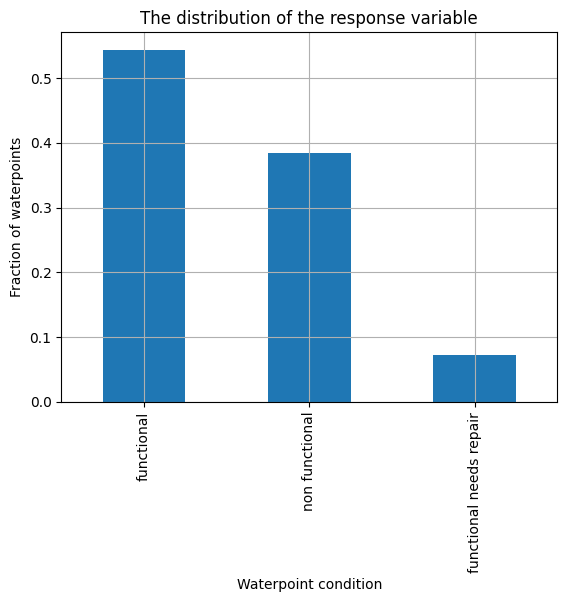

In [71]:
Xy_train.status_group.value_counts(normalize = True).plot.bar()
plt.grid()
plt.title('The distribution of the response variable')
plt.ylabel('Fraction of waterpoints')
plt.xlabel('Waterpoint condition')
plt.show()

# How do the numeric features vary with the response variable ?

In [72]:
Xy_train_num = Xy_train[[c for c in Xy_train.columns if Xy_train[c].dtype in ['int64', 'float64']] + ['status_group']]

In [73]:
Xy_train_num

id  amount_tsh  gps_height  longitude   latitude  region_code  \
0      31080         0.0         NaN  33.179596  -4.214966           14   
1      17282        50.0       -33.0  40.322805 -10.456297           99   
2      72545         0.0       298.0  36.353508  -8.780099            5   
3      44490         0.0         NaN  33.071249  -3.803178           17   
4      67816         5.0      1088.0  37.271938  -3.283501            3   
...      ...         ...         ...        ...        ...          ...   
53455  68525      1000.0       327.0  36.367112  -8.774761            5   
53456  11980      1000.0      1743.0  34.531524  -9.769604           11   
53457  35778         0.0       -13.0  38.974416  -5.420823            4   
53458  49444         0.0         NaN  34.316586  -3.107161           17   
53459  23812         0.0      1290.0  37.626401  -3.211457            3   

       district_code  population  construction_year    status_group  
0                1.0         NaN                NaN      functional  
1                1.0      1000.0             2008.0  non functional  
2                4.0         1.0             1991.0  non functional  
3                3.0         NaN                NaN  non functional  
4                4.0        50.0             2007.0      functional  
...              ...         ...                ...             ...  
53455            4.0       255.0             1995.0      functional  
53456            5.0        35.0             1988.0      functional  
53457            5.0      1000.0             2005.0  non functional  
53458            6.0         NaN                NaN      functional  
53459            1.0         1.0             1976.0  non functional  

[53460 rows x 10 columns]

In [74]:
count_values(df = Xy_train, value = 0.0)

Count of 0.0  0.0's as % of Total
Feature                                      
amount_tsh         37474                 70.1
longitude           1621                  3.0

In [75]:
def plot_seaborn_box(x, y, data, title = None, xlabel = None,\
                     ylabel = None, grid = True,\
                    xticks = None, yticks = None, figsize = None) :
    
    """
    
    Example
    -------
    sns.boxplot(y = 'construction_year', x = 'status_group', data = Xy_train_num)
    """
    
    if xlabel :
        plt.xlabel(xlabel)
    
    if ylabel :
        plt.ylabel(ylabel)
    
    if title :
        plt.title(title)
    
    if xticks :
        plt.xticks(xticks)
        
    if yticks :
        plt.yticks(yticks)
    
    sns.boxplot(y = y, x = x, data = data)
    plt.show()

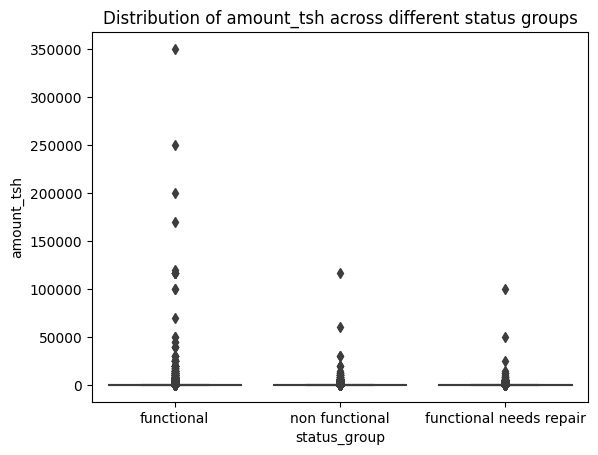

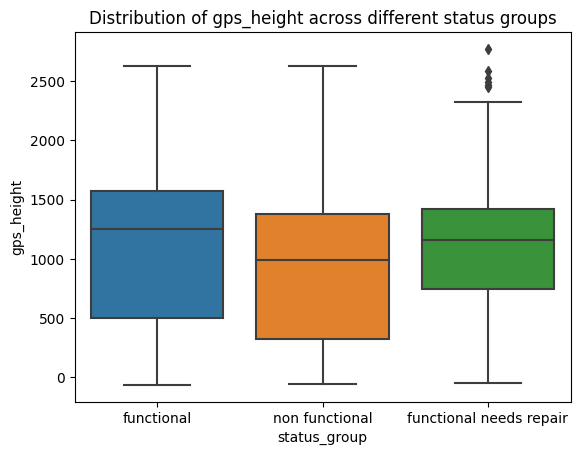

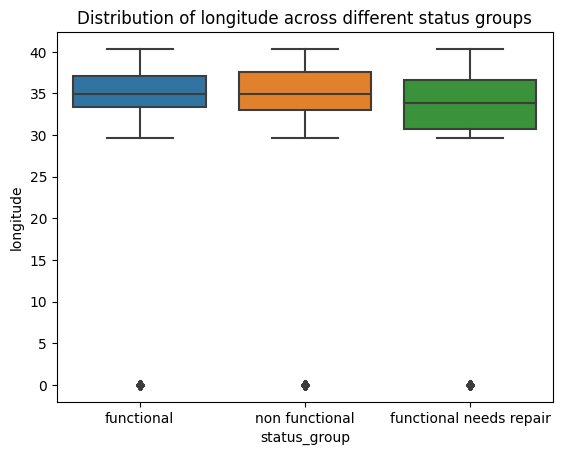

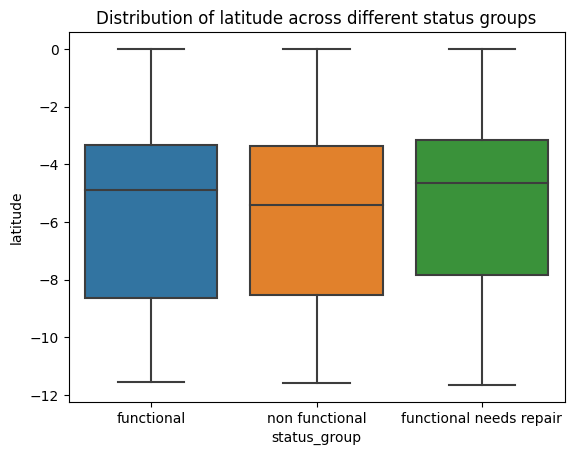

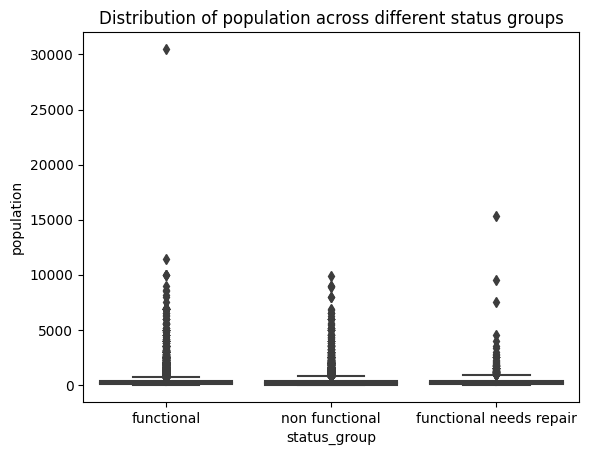

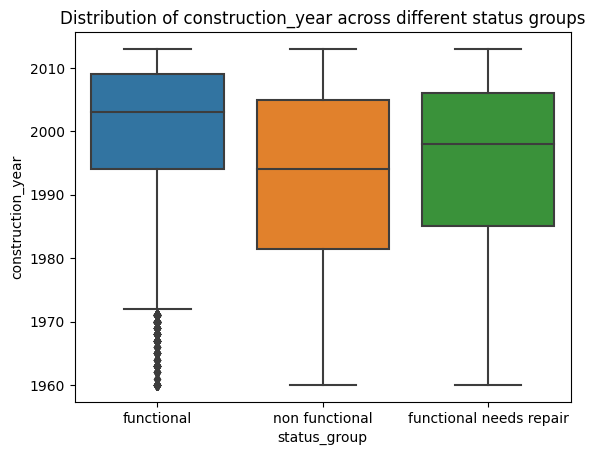

In [76]:
for c in Xy_train_num.columns :
    if (c not in ['status_group', 'id']) & ('code' not in c) :
        print()
        plot_seaborn_box(y = c, x = 'status_group', data = Xy_train_num,\
                         title = 'Distribution of {} across different status groups'\
                         .format(c))
        print()

Based on the boxplots above we find :
- Amount_tsh (amount of water in the well) contain extreme values which distort the distribution and must be explored further
- Functional waterpoints have a median height of about 1250 m compared to 1000 m for non functional ones
- Tanzania is between 29 and 40 degrees East (checked on Web), so any entries whose longitude are not in this range must be incorrect. There are such entries, so they should be treated as NaNs
- There may be incorrect entries in latitude, since there are values as high as 0, whereas Tanzania latitude ranges approxmiately from -1 to -12.5
- The distribution of population needs to be examined more thorougly as the potentiall outliers distort the image

# How do categorical features vary with the response ?

In [77]:
variables_cardinality = {}

for c in Xy_train.columns :
    if Xy_train[c].dtype == 'O' :
        num_uniq = len(Xy_train[c].unique())
        variables_cardinality[c] = [num_uniq]
        print()
        print(f'Variable {c} is categorical and it"s cardinality is {num_uniq}')
        print()


Variable date_recorded is categorical and it"s cardinality is 354


Variable funder is categorical and it"s cardinality is 1789


Variable installer is categorical and it"s cardinality is 2036


Variable wpt_name is categorical and it"s cardinality is 34085


Variable basin is categorical and it"s cardinality is 9


Variable subvillage is categorical and it"s cardinality is 18284


Variable region is categorical and it"s cardinality is 21


Variable lga is categorical and it"s cardinality is 125


Variable ward is categorical and it"s cardinality is 2089


Variable public_meeting is categorical and it"s cardinality is 3


Variable recorded_by is categorical and it"s cardinality is 1


Variable scheme_management is categorical and it"s cardinality is 13


Variable scheme_name is categorical and it"s cardinality is 2630


Variable permit is categorical and it"s cardinality is 3


Variable extraction_type is categorical and it"s cardinality is 18


Variable extraction_type_group is categ

In [78]:
Xy_train.shape

(53460, 40)

In [79]:
cardinality_frame = pd.DataFrame.from_dict(variables_cardinality).transpose()\
.rename(columns = {0 : 'Number of unique values'}).sort_values(ascending = False, by = 'Number of unique values')
cardinality_frame

Number of unique values
wpt_name                                 34085
subvillage                               18284
scheme_name                               2630
ward                                      2089
installer                                 2036
funder                                    1789
date_recorded                              354
lga                                        125
region                                      21
extraction_type                             18
scheme_management                           13
extraction_type_group                       13
management                                  12
source                                      10
basin                                        9
water_quality                                8
extraction_type_class                        7
payment                                      7
payment_type                                 7
waterpoint_type                              7
source_type                                  7
waterpoint_type_group                        6
quality_group                                6
management_group                             5
quantity                                     5
quantity_group                               5
source_class                                 3
status_group                                 3
permit                                       3
public_meeting                               3
recorded_by                                  1

In [80]:
managable_cardinality = cardinality_frame[cardinality_frame < 125].dropna()
managable_cardinality

Number of unique values
region                                    21.0
extraction_type                           18.0
scheme_management                         13.0
extraction_type_group                     13.0
management                                12.0
source                                    10.0
basin                                      9.0
water_quality                              8.0
extraction_type_class                      7.0
payment                                    7.0
payment_type                               7.0
waterpoint_type                            7.0
source_type                                7.0
waterpoint_type_group                      6.0
quality_group                              6.0
management_group                           5.0
quantity                                   5.0
quantity_group                             5.0
source_class                               3.0
status_group                               3.0
permit                                     3.0
public_meeting                             3.0
recorded_by                                1.0

In [81]:
Xy_train.recorded_by.value_counts()

GeoData Consultants Ltd    53460
Name: recorded_by, dtype: int64

Recorded by has only one unique values, so it should be deleted, as it won't affect predictions.

In [82]:
del Xy_train['recorded_by']

In [83]:
managable_cardinality = managable_cardinality.drop('recorded_by')

In [84]:
managable_cardinality

Number of unique values
region                                    21.0
extraction_type                           18.0
scheme_management                         13.0
extraction_type_group                     13.0
management                                12.0
source                                    10.0
basin                                      9.0
water_quality                              8.0
extraction_type_class                      7.0
payment                                    7.0
payment_type                               7.0
waterpoint_type                            7.0
source_type                                7.0
waterpoint_type_group                      6.0
quality_group                              6.0
management_group                           5.0
quantity                                   5.0
quantity_group                             5.0
source_class                               3.0
status_group                               3.0
permit                                     3.0
public_meeting                             3.0

In [86]:
less_ten_uniq_vals = managable_cardinality[managable_cardinality < 10].dropna()

In [88]:
at_least_ten_uniq_vals = managable_cardinality[managable_cardinality >= 10].dropna()

In [90]:
less_ten_uniq_vals

Number of unique values
basin                                      9.0
water_quality                              8.0
extraction_type_class                      7.0
payment                                    7.0
payment_type                               7.0
waterpoint_type                            7.0
source_type                                7.0
waterpoint_type_group                      6.0
quality_group                              6.0
management_group                           5.0
quantity                                   5.0
quantity_group                             5.0
source_class                               3.0
status_group                               3.0
permit                                     3.0
public_meeting                             3.0

# Normalize counts later

In [95]:
pivot = plot_grouped_bar(Xy_train, ['basin', 'status_group'], 'basin', 'status_group',\
                 title = 'Counts of different categories of basin across categories of the waterpoint status group',\
                xlabel = 'Category of basin', ylabel = 'Count',\
                 leg_title = 'Waterpoint status group', pivot_only = True)
pivot

status_group             functional  functional needs repair  non functional
basin                                                                       
Internal                       4049                      502            2441
Lake Nyasa                     2995                      225            1362
Lake Rukwa                      902                      239            1066
Lake Tanganyika                2810                      675            2320
Lake Victoria                  4559                      900            3737
Pangani                        4858                      419            2790
Rufiji                         4559                      391            2209
Ruvuma / Southern Coast        1510                      293            2259
Wami / Ruvu                    2820                      248            2322

In [101]:
pd.concat([pivot.loc['Internal'] / pivot.loc['Internal'].sum())

status_group
functional                 0.579090
functional needs repair    0.071796
non functional             0.349113
functional                 0.653645
functional needs repair    0.049105
non functional             0.297250
dtype: float64

<Figure size 1400x1000 with 0 Axes>

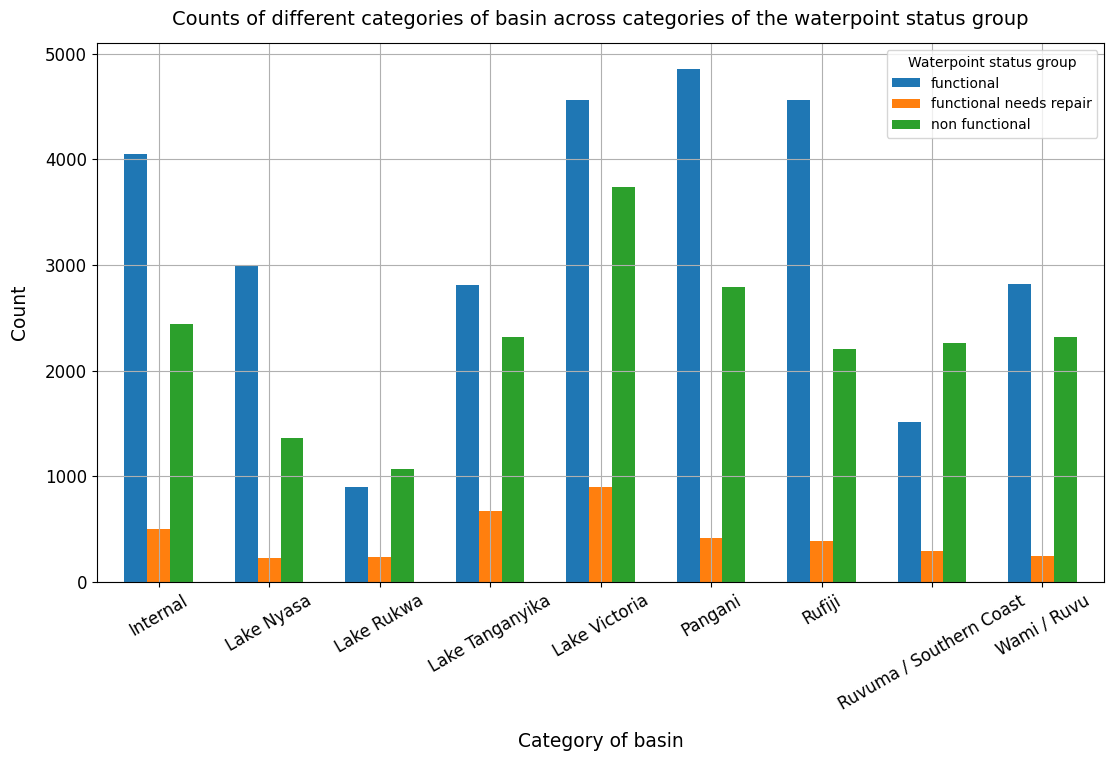

<Figure size 1400x1000 with 0 Axes>

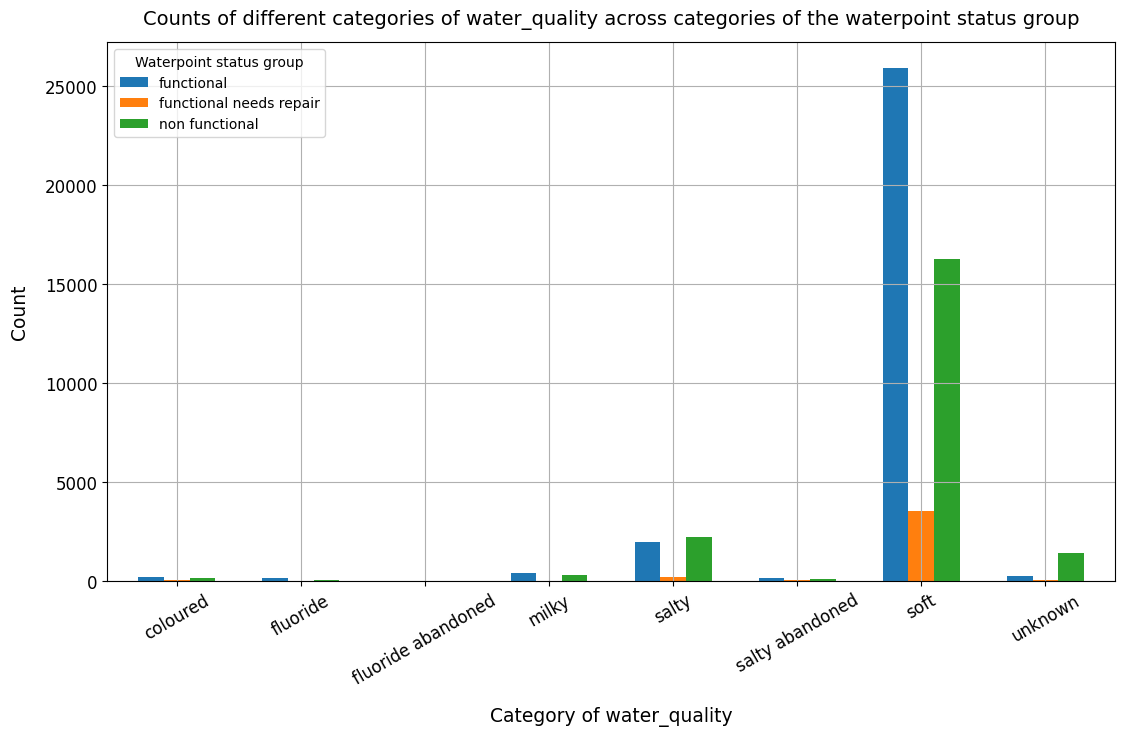

<Figure size 1400x1000 with 0 Axes>

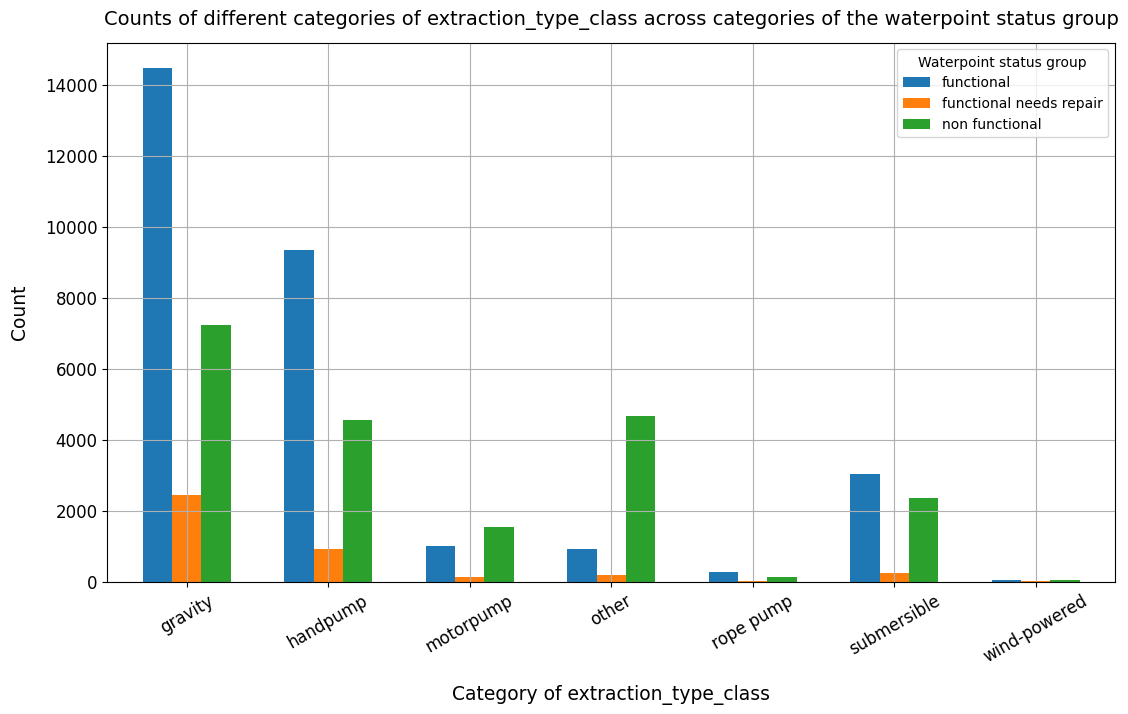

<Figure size 1400x1000 with 0 Axes>

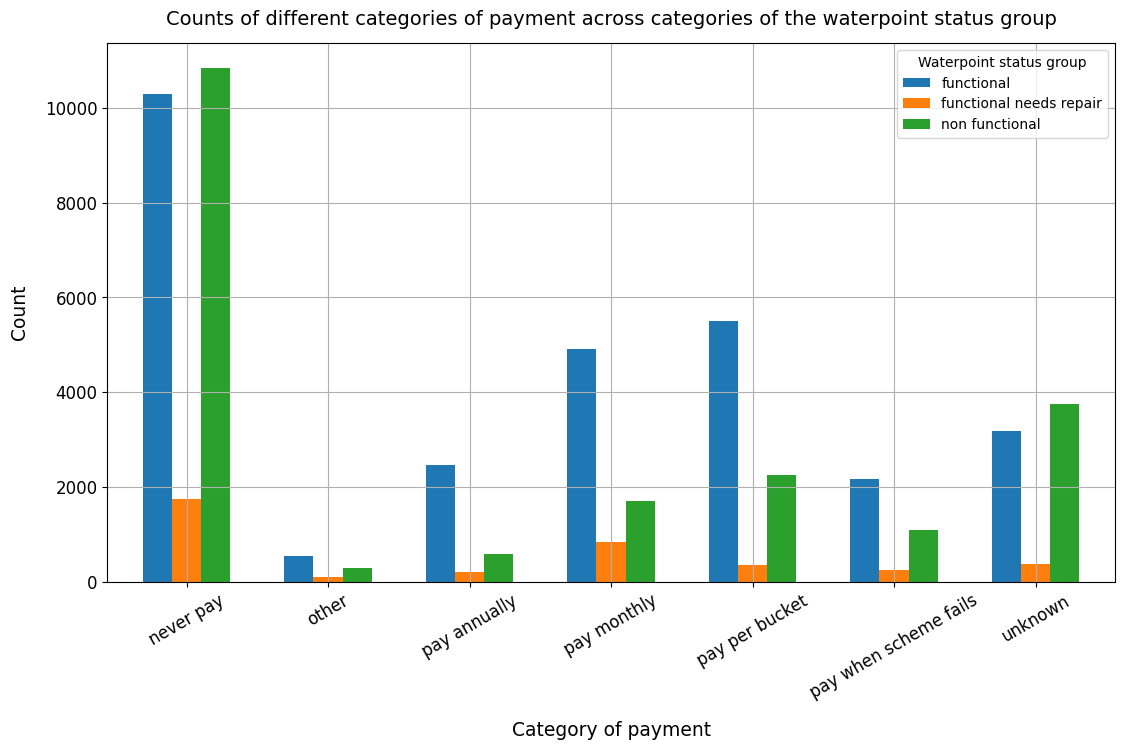

<Figure size 1400x1000 with 0 Axes>

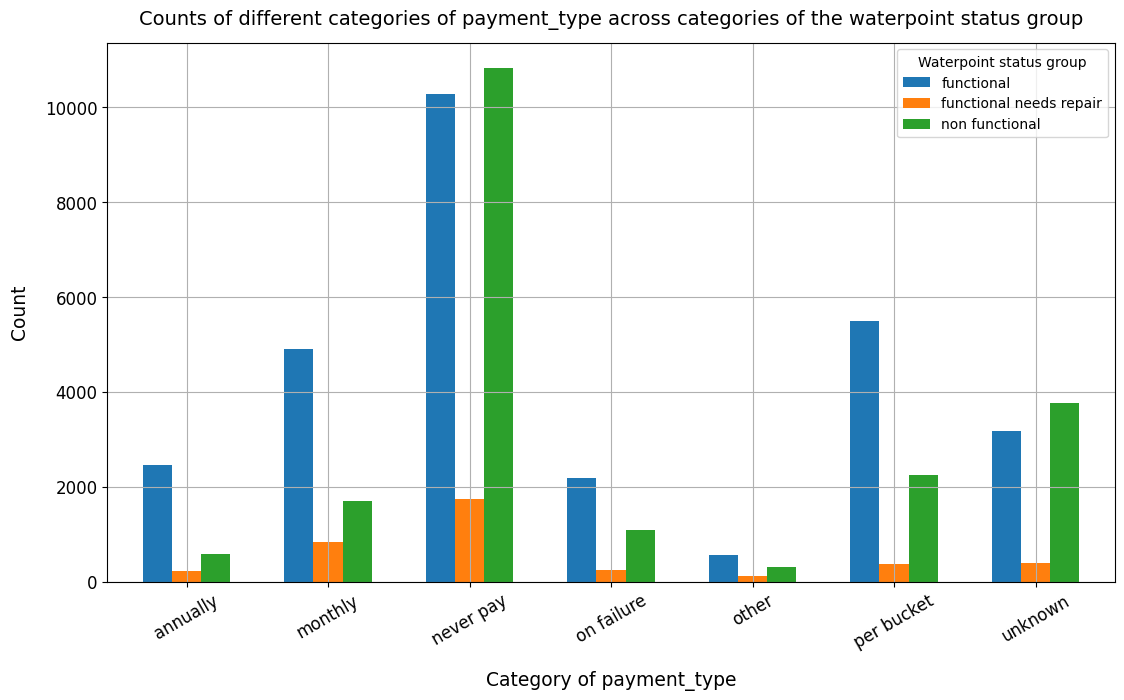

<Figure size 1400x1000 with 0 Axes>

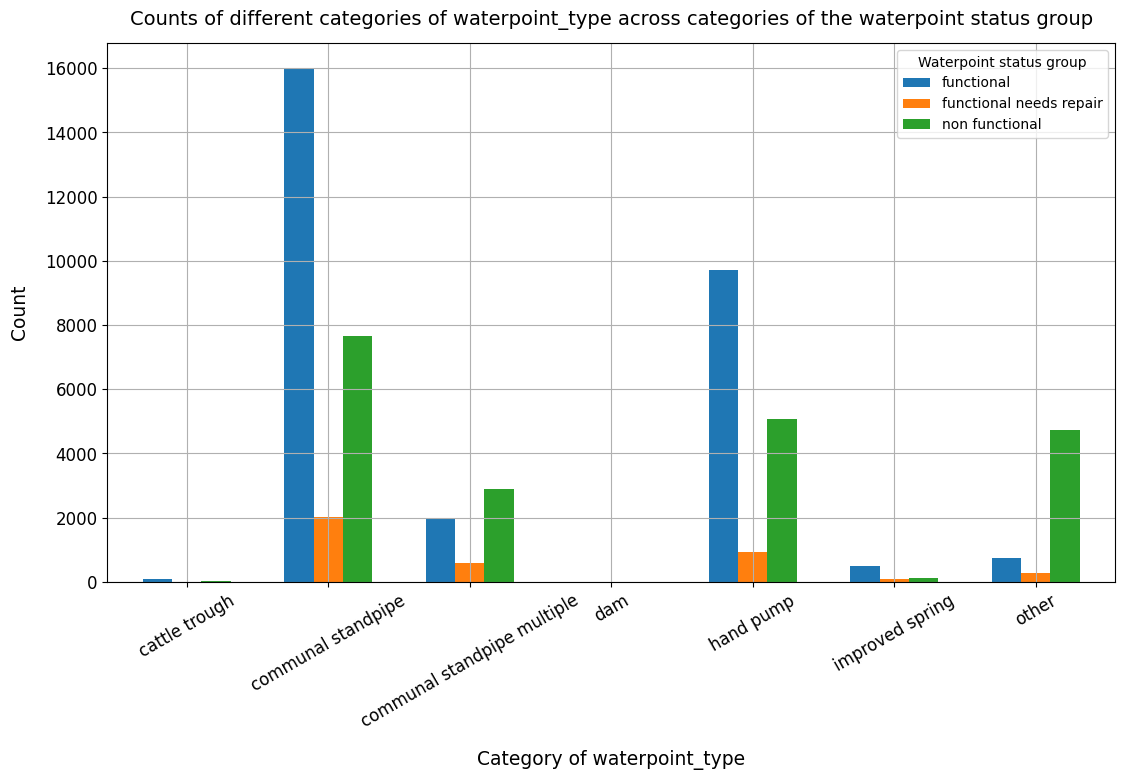

<Figure size 1400x1000 with 0 Axes>

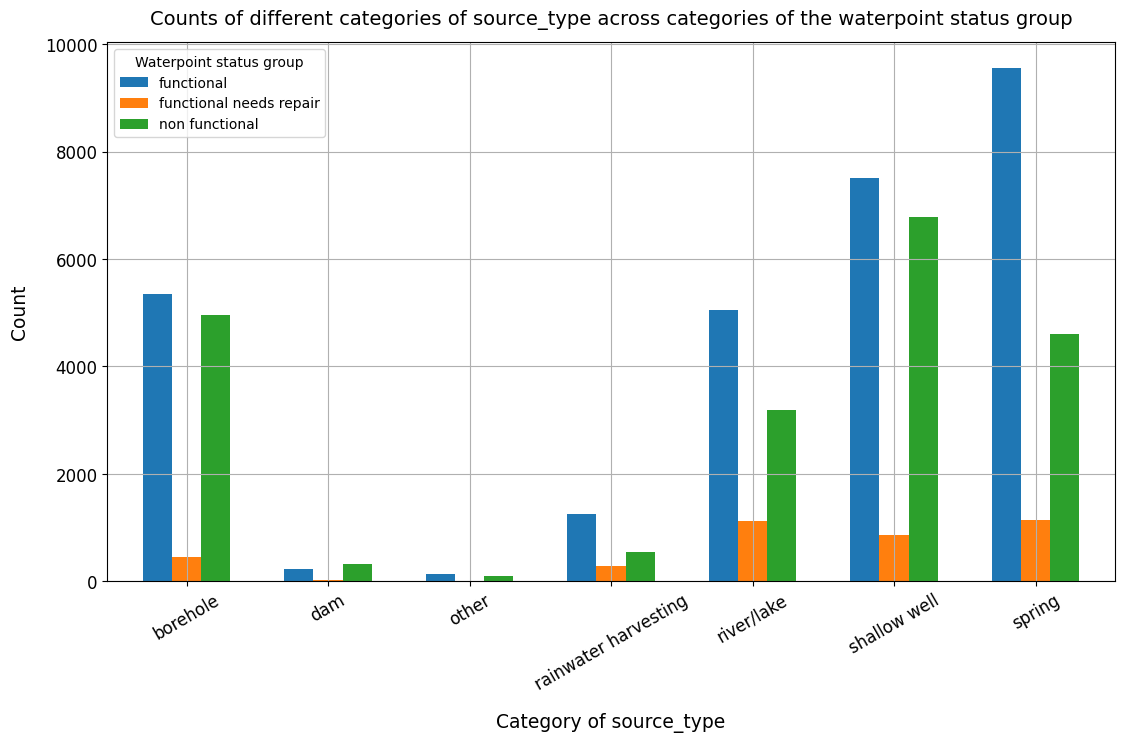

<Figure size 1400x1000 with 0 Axes>

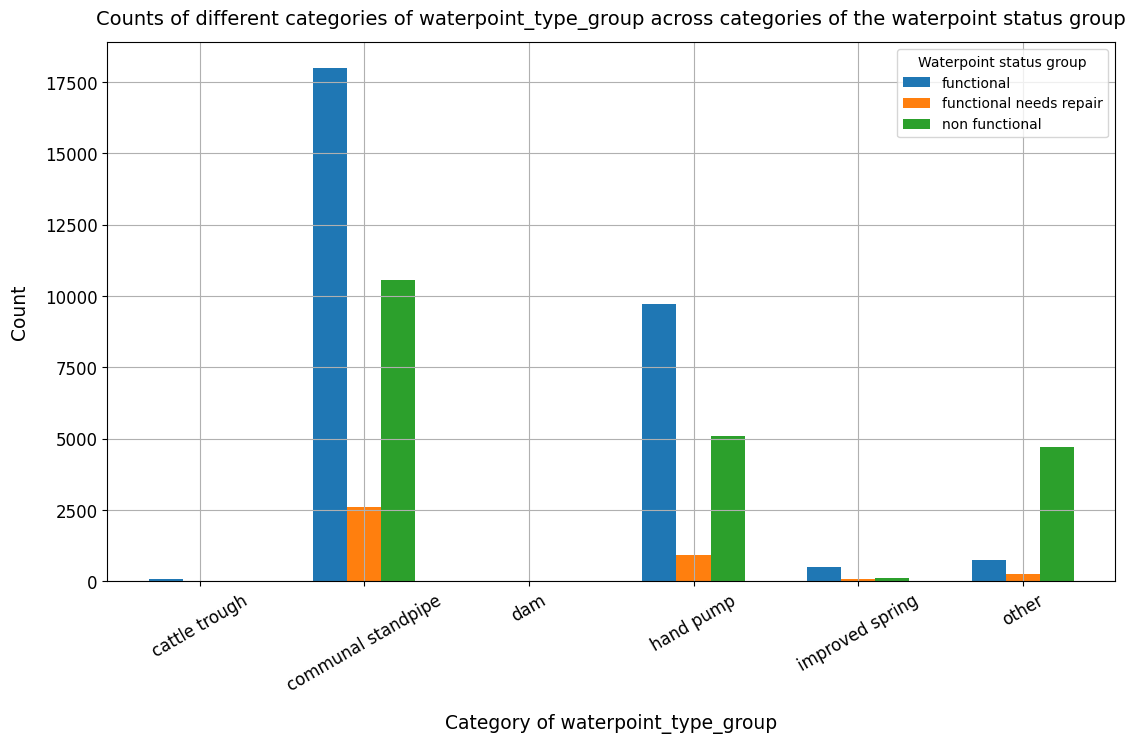

<Figure size 1400x1000 with 0 Axes>

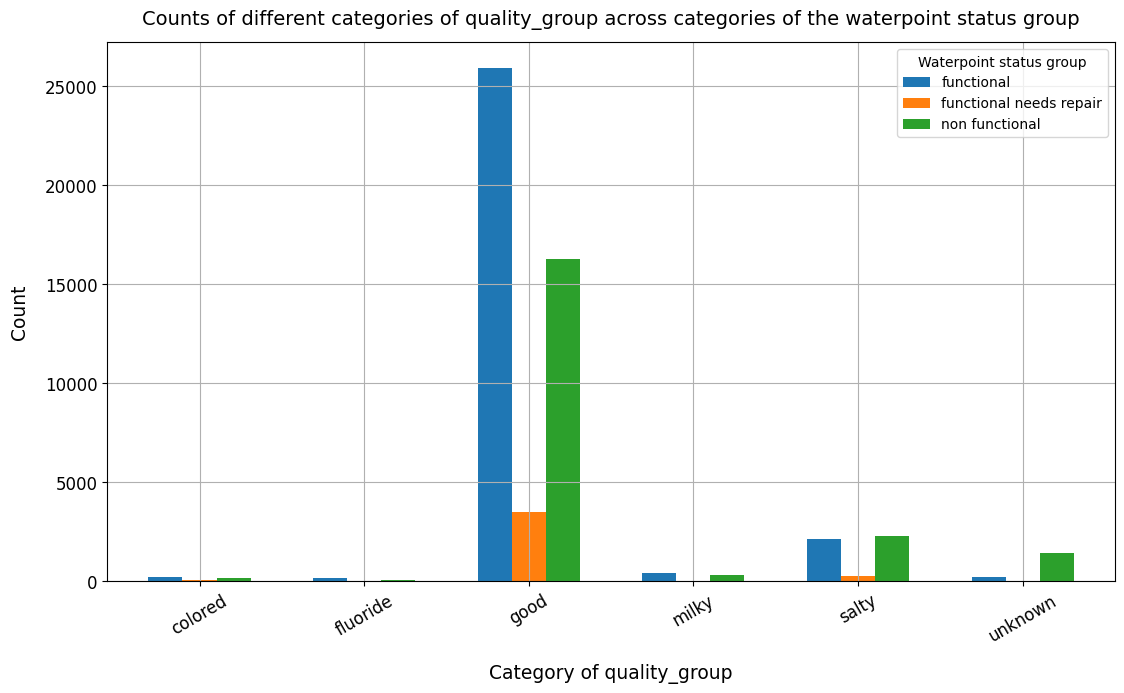

<Figure size 1400x1000 with 0 Axes>

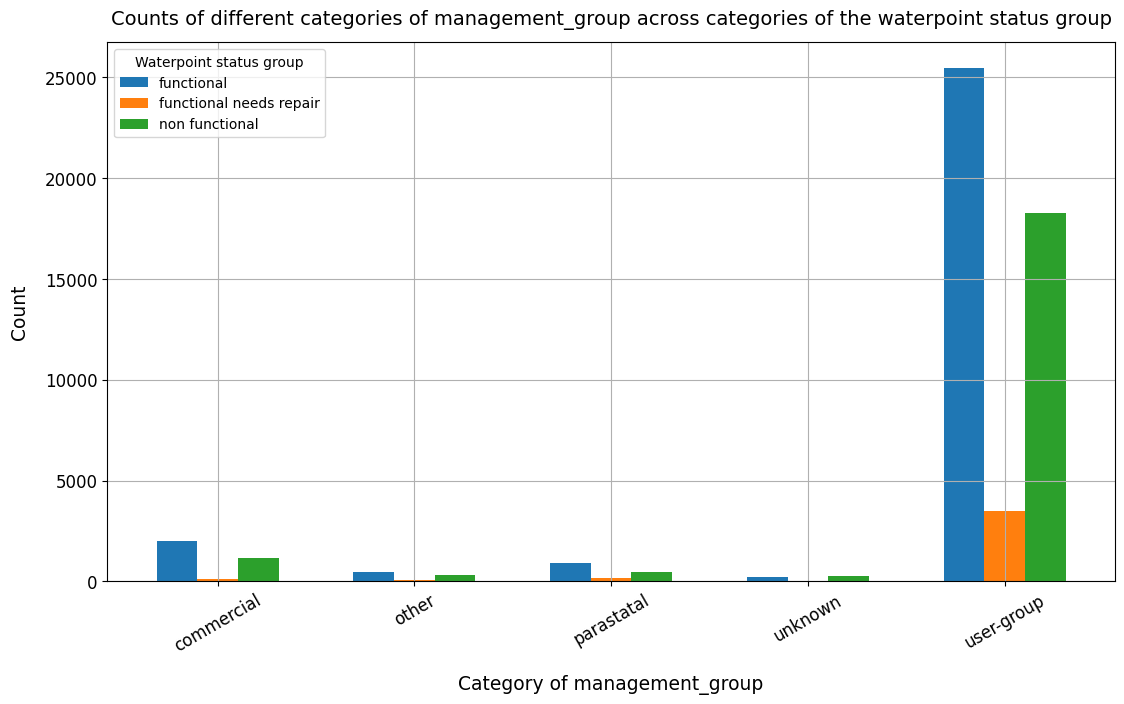

<Figure size 1400x1000 with 0 Axes>

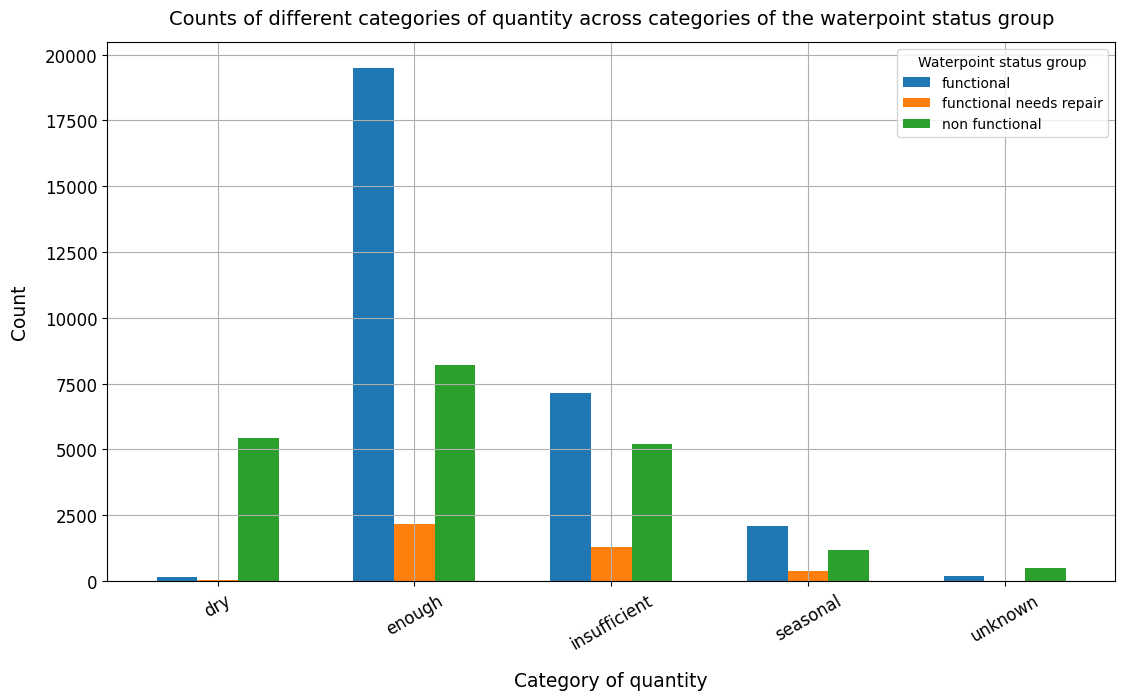

<Figure size 1400x1000 with 0 Axes>

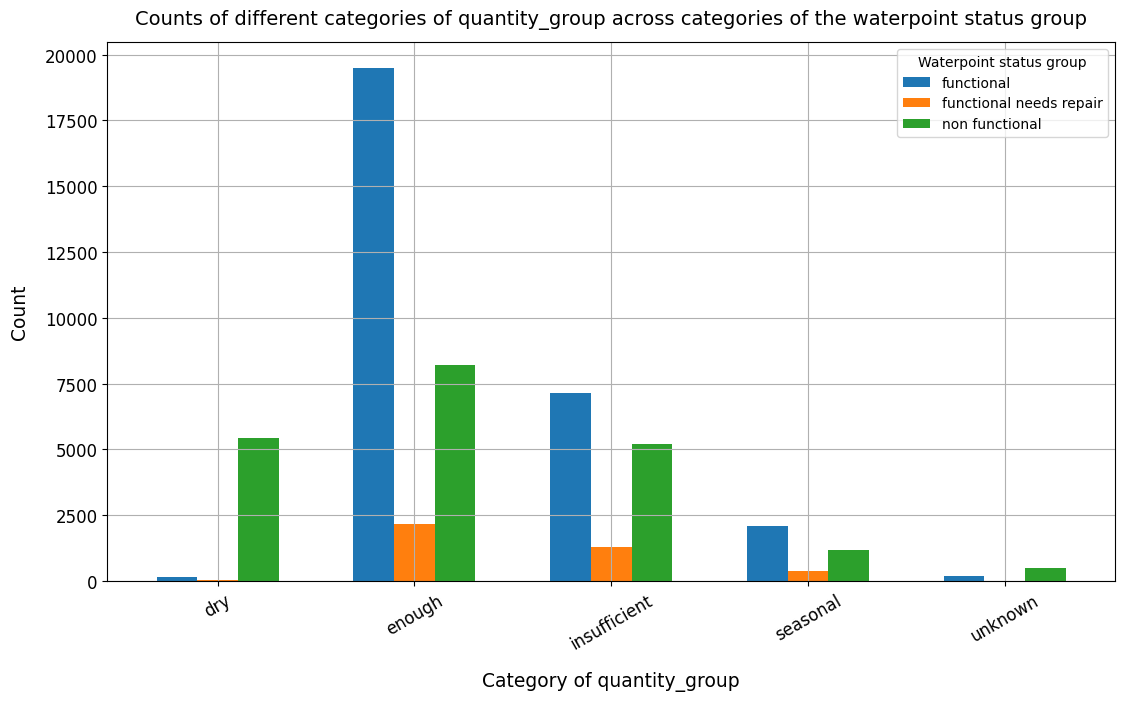

<Figure size 1400x1000 with 0 Axes>

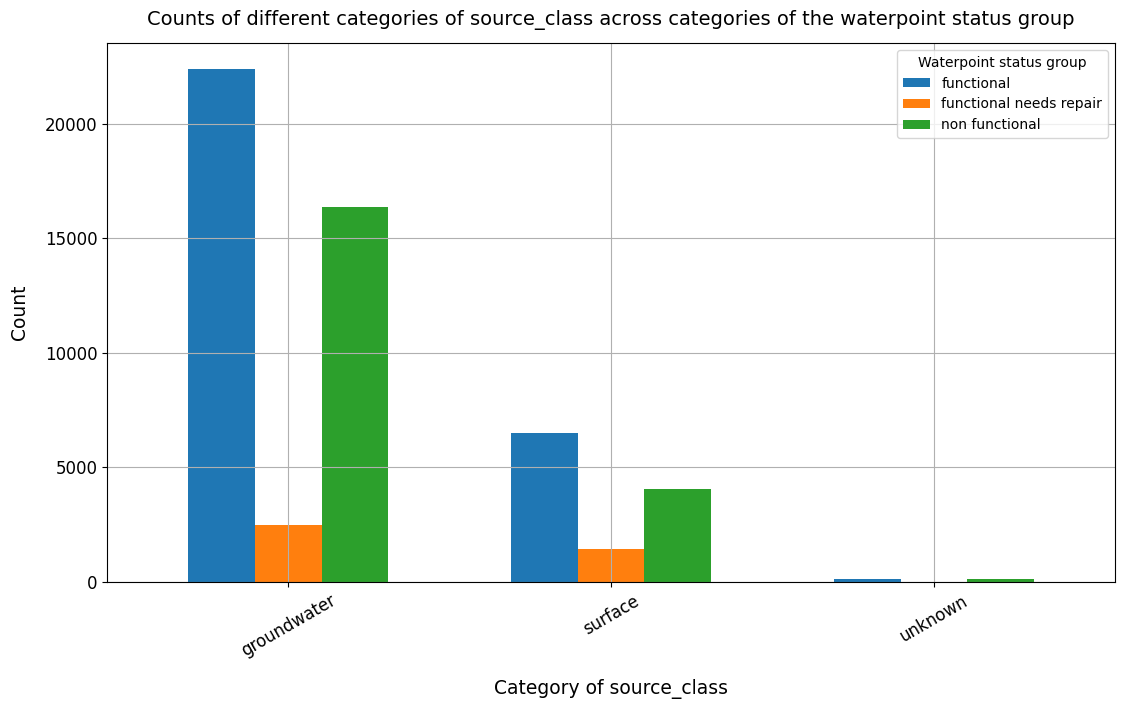

<Figure size 1400x1000 with 0 Axes>

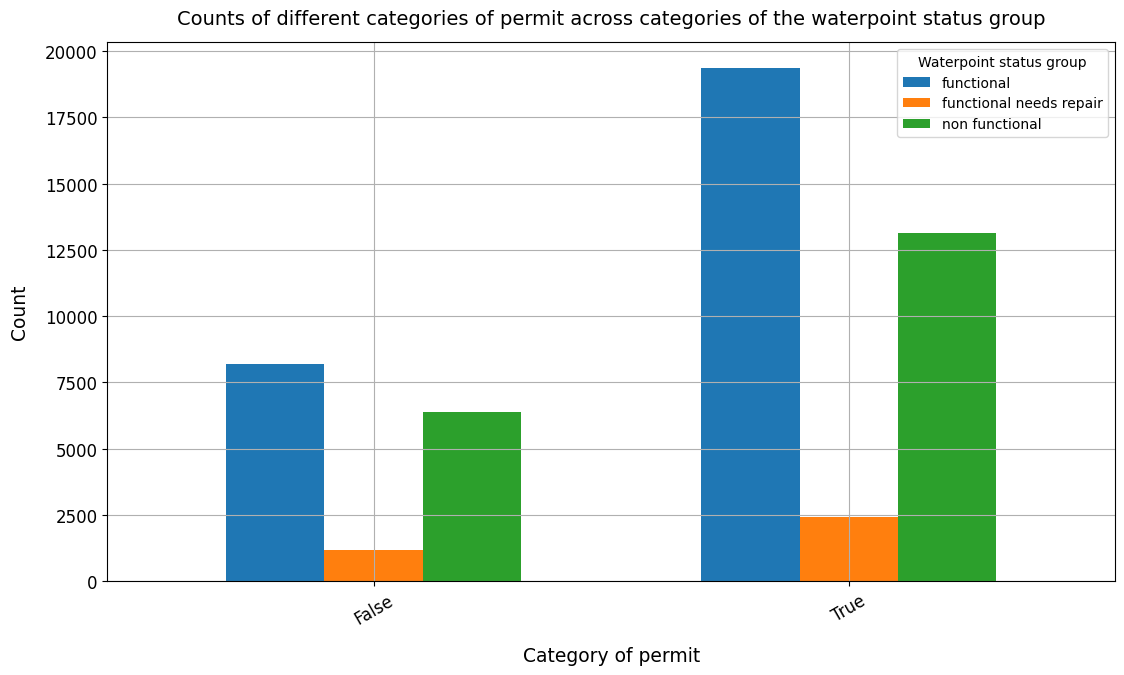

<Figure size 1400x1000 with 0 Axes>

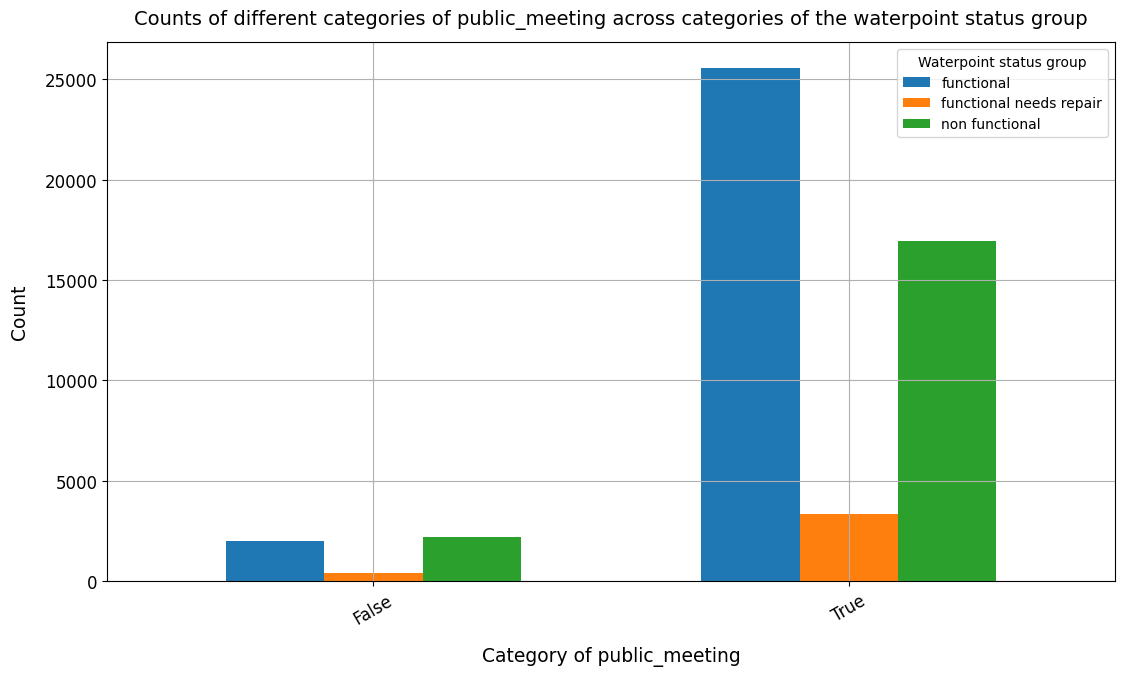

In [116]:
for i, v in zip(less_ten_uniq_vals.index, less_ten_uniq_vals.values) :
    if i != 'status_group' :
        plt.figure(figsize = (14, 10))
        plot_grouped_bar(Xy_train, [i, 'status_group'], i, 'status_group',\
                    title = f'Counts of different categories of {i} across categories of the waterpoint status group',\
                xlabel = f'Category of {i}', ylabel = 'Count',\
                    leg_title = 'Waterpoint status group')
        
       

In [133]:
Xy_train.population.describe().round(2)

count    34271.00
mean       279.96
std        561.79
min          1.00
25%         40.00
50%        150.00
75%        324.50
max      30500.00
Name: population, dtype: float64

In [134]:
Xy_train.groupby('status_group').population.describe().round(2)

count    mean     std  min   25%    50%    75%  \
status_group                                                                
functional               18941.0  285.46  605.86  1.0  45.0  150.0  312.0   
functional needs repair   2290.0  301.62  532.68  1.0  60.0  200.0  400.0   
non functional           13040.0  268.17  496.23  1.0   1.0  150.0  320.0   

                             max  
status_group                      
functional               30500.0  
functional needs repair  15300.0  
non functional            9865.0

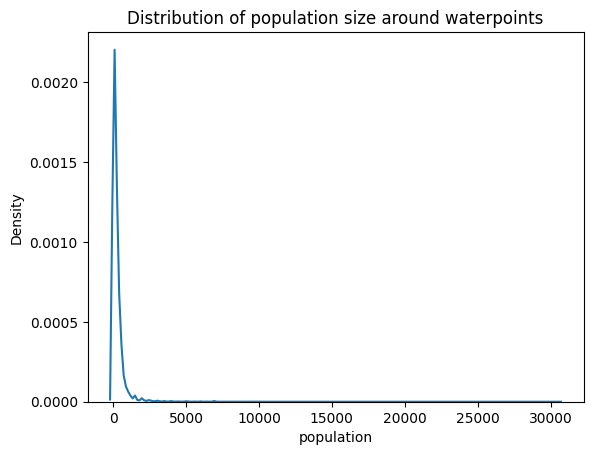

In [138]:
sns.kdeplot(x = 'population', data = Xy_train)
plt.title('Distribution of population size around waterpoints')
plt.show()

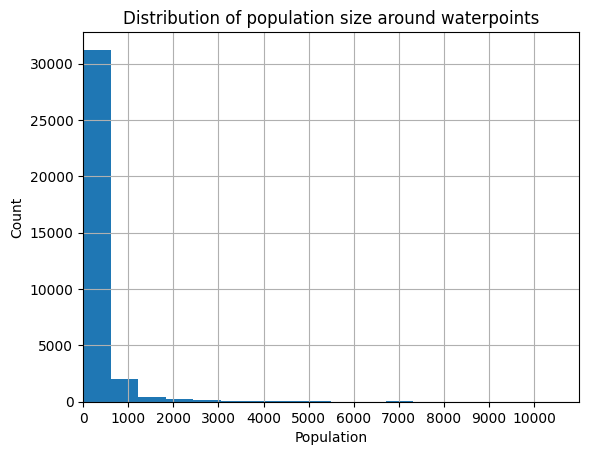

In [155]:
Xy_train.population.plot.hist(bins = 50)
plt.xlabel('Population')
plt.ylabel('Count')
plt.title('Distribution of population size around waterpoints')
plt.xlim((0, 11000))
plt.xticks([*range(0, 11000, 1000)])
plt.grid()
plt.show()

In [170]:
#pop = pd.read_csv('sample10population_above_5000.csv')
#= Xy_train[Xy_train.population > 5000].sample(n = 10)

On inspecting random 10 population entries above 5000 peeple the data seem more or less plausible, since the population around the well is always less than the actual population of the whole ward and is not so extreme.

In [172]:
Xy_train[Xy_train.population > 10000]

id  amount_tsh date_recorded                  funder  gps_height  \
6425   30750        50.0    2011-03-04                    Wsdp        26.0   
10884  12169         NaN    2011-03-12  Government Of Tanzania       184.0   
45975  49354         NaN    2013-02-21             Water Board      1084.0   

         installer  longitude  latitude   wpt_name        basin   subvillage  \
6425           DWE  38.727663 -6.724701    Msagasa  Wami / Ruvu  Kilangalang   
10884          DWE  38.783756 -5.181904   Mkwajuni      Pangani     Mkwajuni   
45975  Water board  36.386050 -4.787678  Mashineni     Internal  Engarakashi   

        region  region_code  district_code     lga      ward  population  \
6425     Pwani            6            2.0  Kibaha  Mlandizi     11463.0   
10884    Tanga            4            3.0  Muheza  Masuguru     30500.0   
45975  Manyara           21            5.0  Kiteto    Makame     15300.0   

      public_meeting              recorded_by scheme_management  scheme_name  \
6425            True  GeoData Consultants Ltd               VWC     Borehole   
10884           True  GeoData Consultants Ltd               VWC          NaN   
45975           True  GeoData Consultants Ltd               VWC  Water board   

      permit  construction_year extraction_type extraction_type_group  \
6425    True             2006.0            mono                  mono   
10884  False             2008.0     nira/tanira           nira/tanira   
45975  False             1983.0     submersible           submersible   

      extraction_type_class management management_group         payment  \
6425              motorpump        vwc       user-group  pay per bucket   
10884              handpump        vwc       user-group       never pay   
45975           submersible        vwc       user-group       never pay   

      payment_type water_quality quality_group      quantity quantity_group  \
6425    per bucket          soft          good        enough         enough   
10884    never pay         salty         salty  insufficient   insufficient   
45975    never pay          soft          good  insufficient   insufficient   

             source   source_type source_class     waterpoint_type  \
6425          river    river/lake      surface  communal standpipe   
10884  shallow well  shallow well  groundwater           hand pump   
45975   machine dbh      borehole  groundwater  communal standpipe   

      waterpoint_type_group             status_group  
6425     communal standpipe               functional  
10884             hand pump               functional  
45975    communal standpipe  functional needs repair

Mkwajuni had a population of 22K back in 2002 so it's conceivable that it grew by 8500 or 39 % over the next 10 years.

https://en.wikipedia.org/wiki/Mkwajuni#:~:text=Mkwajuni%20is%20an%20administrative%20ward,a%20total%20population%20of%2022%2C101.

It seems that the values in population are on the whole correct.

In [126]:
Xy_train[Xy_train.latitude > - 0.9]

id  amount_tsh date_recorded                  funder  gps_height  \
6      12282         NaN    2011-08-07  Government Of Tanzania         NaN   
12     56023         NaN    2011-07-18  Government Of Tanzania         NaN   
19     26944         NaN    2011-07-30                  Hesawa         NaN   
83     45957         NaN    2011-07-24                  Tanapa         NaN   
111    16593         NaN    2011-08-26  Government Of Tanzania         NaN   
...      ...         ...           ...                     ...         ...   
53334  30428         NaN    2013-02-16                    Dwsp         NaN   
53345  60259         NaN    2011-07-19                  Hesawa         NaN   
53348  55213         NaN    2012-10-24                  Hesawa         NaN   
53359  30192         NaN    2011-08-12                  Hesawa         NaN   
53386   3854         NaN    2012-10-26                 Holland         NaN   

        installer  longitude      latitude    wpt_name            basin  \
6      Government        NaN -2.000000e-08     Bombani    Lake Victoria   
12     Government        NaN -2.000000e-08    Hospital    Lake Victoria   
19            DWE        NaN -2.000000e-08     Bombani    Lake Victoria   
83         TANAPA        NaN -2.000000e-08       Jamii    Lake Victoria   
111    Government        NaN -2.000000e-08     Shabani    Lake Victoria   
...           ...        ...           ...         ...              ...   
53334         DWE        NaN -2.000000e-08    Muungano    Lake Victoria   
53345         DWE        NaN -2.000000e-08       Maige    Lake Victoria   
53348         DWE        NaN -2.000000e-08  Kwa Kanuti    Lake Victoria   
53359         DWE        NaN -2.000000e-08      Ezekia  Lake Tanganyika   
53386     HOLLAND        NaN -2.000000e-08       Jamii    Lake Victoria   

      subvillage     region  region_code  district_code      lga  \
6       K/Center     Mwanza           19            6.0    Geita   
12        Nyanza     Mwanza           19            6.0    Geita   
19      Ushirika     Mwanza           19            6.0    Geita   
83      Mwamongo  Shinyanga           17            1.0  Bariadi   
111      Majengo     Mwanza           19            6.0    Geita   
...          ...        ...          ...            ...      ...   
53334    Nyamswa  Shinyanga           17            1.0  Bariadi   
53345    Katundu     Mwanza           19            6.0    Geita   
53348      Selya     Mwanza           19            2.0     Magu   
53359      Mraba     Mwanza           19            6.0    Geita   
53386     Habare     Mwanza           17            1.0     Magu   

               ward  population public_meeting              recorded_by  \
6            Kakora         NaN           True  GeoData Consultants Ltd   
12      Kalangalala         NaN           True  GeoData Consultants Ltd   
19          Kasamwa         NaN           True  GeoData Consultants Ltd   
83         Mwaswale         NaN          False  GeoData Consultants Ltd   
111    Nyachiluluma         NaN           True  GeoData Consultants Ltd   
...             ...         ...            ...                      ...   
53334        Mhango         NaN            NaN  GeoData Consultants Ltd   
53345   Kalangalala         NaN           True  GeoData Consultants Ltd   
53348    Mwananyili         NaN           True  GeoData Consultants Ltd   
53359      Mwingiro         NaN           True  GeoData Consultants Ltd   
53386      Nkungulu         NaN            NaN  GeoData Consultants Ltd   

      scheme_management  scheme_name permit  construction_year  \
6                   VWC   Nyamtukuza   True                NaN   
12                  VWC  Kalangalala   True                NaN   
19                  VWC          NaN   True                NaN   
83           Parastatal          NaN  False                NaN   
111                 VWC          NaN   True                NaN   
...                 ...          ...    ...               

In [121]:
print('Some latitudes have a format like this : {}. It"s type is {}'\
      .format(Xy_train[Xy_train.id == 12282].latitude.iloc[0], type(Xy_train[Xy_train.id == 12282].latitude.iloc[0])))

Some latitudes have a format like this : -2e-08. It"s type is <class 'numpy.float64'>


In [127]:
Xy_train[Xy_train.latitude.astype(str).str.contains('-2e-08')]

id  amount_tsh date_recorded                  funder  gps_height  \
6      12282         NaN    2011-08-07  Government Of Tanzania         NaN   
12     56023         NaN    2011-07-18  Government Of Tanzania         NaN   
19     26944         NaN    2011-07-30                  Hesawa         NaN   
83     45957         NaN    2011-07-24                  Tanapa         NaN   
111    16593         NaN    2011-08-26  Government Of Tanzania         NaN   
...      ...         ...           ...                     ...         ...   
53334  30428         NaN    2013-02-16                    Dwsp         NaN   
53345  60259         NaN    2011-07-19                  Hesawa         NaN   
53348  55213         NaN    2012-10-24                  Hesawa         NaN   
53359  30192         NaN    2011-08-12                  Hesawa         NaN   
53386   3854         NaN    2012-10-26                 Holland         NaN   

        installer  longitude      latitude    wpt_name            basin  \
6      Government        NaN -2.000000e-08     Bombani    Lake Victoria   
12     Government        NaN -2.000000e-08    Hospital    Lake Victoria   
19            DWE        NaN -2.000000e-08     Bombani    Lake Victoria   
83         TANAPA        NaN -2.000000e-08       Jamii    Lake Victoria   
111    Government        NaN -2.000000e-08     Shabani    Lake Victoria   
...           ...        ...           ...         ...              ...   
53334         DWE        NaN -2.000000e-08    Muungano    Lake Victoria   
53345         DWE        NaN -2.000000e-08       Maige    Lake Victoria   
53348         DWE        NaN -2.000000e-08  Kwa Kanuti    Lake Victoria   
53359         DWE        NaN -2.000000e-08      Ezekia  Lake Tanganyika   
53386     HOLLAND        NaN -2.000000e-08       Jamii    Lake Victoria   

      subvillage     region  region_code  district_code      lga  \
6       K/Center     Mwanza           19            6.0    Geita   
12        Nyanza     Mwanza           19            6.0    Geita   
19      Ushirika     Mwanza           19            6.0    Geita   
83      Mwamongo  Shinyanga           17            1.0  Bariadi   
111      Majengo     Mwanza           19            6.0    Geita   
...          ...        ...          ...            ...      ...   
53334    Nyamswa  Shinyanga           17            1.0  Bariadi   
53345    Katundu     Mwanza           19            6.0    Geita   
53348      Selya     Mwanza           19            2.0     Magu   
53359      Mraba     Mwanza           19            6.0    Geita   
53386     Habare     Mwanza           17            1.0     Magu   

               ward  population public_meeting              recorded_by  \
6            Kakora         NaN           True  GeoData Consultants Ltd   
12      Kalangalala         NaN           True  GeoData Consultants Ltd   
19          Kasamwa         NaN           True  GeoData Consultants Ltd   
83         Mwaswale         NaN          False  GeoData Consultants Ltd   
111    Nyachiluluma         NaN           True  GeoData Consultants Ltd   
...             ...         ...            ...                      ...   
53334        Mhango         NaN            NaN  GeoData Consultants Ltd   
53345   Kalangalala         NaN           True  GeoData Consultants Ltd   
53348    Mwananyili         NaN           True  GeoData Consultants Ltd   
53359      Mwingiro         NaN           True  GeoData Consultants Ltd   
53386      Nkungulu         NaN            NaN  GeoData Consultants Ltd   

      scheme_management  scheme_name permit  construction_year  \
6                   VWC   Nyamtukuza   True                NaN   
12                  VWC  Kalangalala   True                NaN   
19                  VWC          NaN   True                NaN   
83           Parastatal          NaN  False                NaN   
111                 VWC          NaN   True                NaN   
...                 ...          ...    ...               

In [129]:
Xy_train.loc[Xy_train.latitude.astype(str).str.contains('-2e-08'), 'latitude'] = np.nan

In [131]:
(Xy_train.isnull().sum().sort_values(ascending = False) / len(Xy_train)).round(2).head(15)

amount_tsh           0.70
scheme_name          0.47
population           0.36
construction_year    0.35
gps_height           0.34
scheme_management    0.06
installer            0.06
funder               0.06
public_meeting       0.06
permit               0.05
longitude            0.03
latitude             0.03
subvillage           0.01
district_code        0.00
quantity_group       0.00
dtype: float64

In [78]:
Xy_train.head()

id  amount_tsh date_recorded      funder  gps_height installer  \
0  31080         0.0    2012-10-10         Dwe         NaN    WEDECO   
1  17282        50.0    2013-02-16       Jaica       -33.0     Tasaf   
2  72545         0.0    2011-03-20         Dhv       298.0       DWE   
3  44490         0.0    2012-10-12       Rwssp         NaN     RWSSP   
4  67816         5.0    2013-02-04  Ces (gmbh)      1088.0       DWE   

   longitude   latitude                 wpt_name                    basin  \
0  33.179596  -4.214966                Hospitali                 Internal   
1  40.322805 -10.456297        Kwa Bakari Ismail  Ruvuma / Southern Coast   
2  36.353508  -8.780099            Kwa Mgirigiti                   Rufiji   
3  33.071249  -3.803178                   Ujamaa            Lake Victoria   
4  37.271938  -3.283501  Kwa Richard Simon Chami                  Pangani   

   subvillage       region  region_code  district_code              lga  \
0     Majengo       Tabora           14            1.0            Nzega   
1     Kipingo       Mtwara           99            1.0     Mtwara Rural   
2  Kilungwili     Morogoro            5            4.0           Ulanga   
3      Busubi    Shinyanga           17            3.0  Shinyanga Rural   
4      Muyuni  Kilimanjaro            3            4.0      Moshi Rural   

          ward  population public_meeting              recorded_by  \
0  Nzega Urban         NaN          False  GeoData Consultants Ltd   
1    Mahurunga      1000.0           True  GeoData Consultants Ltd   
2     Mtimbira         1.0           True  GeoData Consultants Ltd   
3        Didia         NaN           True  GeoData Consultants Ltd   
4        Kindi        50.0           True  GeoData Consultants Ltd   

  scheme_management                  scheme_name permit  construction_year  \
0   Water authority        Kilimi and uchama dam   True                NaN   
1               VWC         Tangazo water supply   True             2008.0   
2               NaN                          NaN   True             1991.0   
3               WUG                          NaN   True                NaN   
4       Water Board  Lyamungo umbwe water supply   True             2007.0   

  extraction_type extraction_type_group extraction_type_class  \
0             ksb           submersible           submersible   
1     submersible           submersible           submersible   
2           other                 other                 other   
3           other                 other                 other   
4         gravity               gravity               gravity   

        management management_group         payment payment_type  \
0  water authority       commercial  pay per bucket   per bucket   
1              vwc       user-group  pay per bucket   per bucket   
2              wug       user-group       never pay    never pay   
3              wug       user-group       never pay    never pay   
4      water board       user-group  pay per bucket   per bucket   

  water_quality quality_group      quantity quantity_group        source  \
0      coloured       colored  insufficient   insufficient           dam   
1         salty         salty        enough         enough   machine dbh   
2          soft          good  insufficient   insufficient  shallow well   
3          soft          good        enough         enough  shallow well   
4          soft          good        enough         enough         river   

    source_type source_class              waterpoint_type  \
0           dam      surface                          dam   
1      borehole  groundwater  communal standpipe multiple   
2  shallow well  groundwater                        other   
3  shallow well  groundwater                        other   
4    river/lake      surface           communal standpipe   

  waterpoint_type_group    status_group  
0                   dam      functional  
1    communal standpipe  non functional  
2                 o

In [79]:
Xy_train[(Xy_train.longitude > 40.5) | (Xy_train.longitude < 28.5)]

id  amount_tsh date_recorded                  funder  gps_height  \
6      12282         0.0    2011-08-07  Government Of Tanzania         NaN   
12     56023         0.0    2011-07-18  Government Of Tanzania         NaN   
19     26944         0.0    2011-07-30                  Hesawa         NaN   
83     45957         0.0    2011-07-24                  Tanapa         NaN   
111    16593         0.0    2011-08-26  Government Of Tanzania         NaN   
...      ...         ...           ...                     ...         ...   
53334  30428         0.0    2013-02-16                    Dwsp         NaN   
53345  60259         0.0    2011-07-19                  Hesawa         NaN   
53348  55213         0.0    2012-10-24                  Hesawa         NaN   
53359  30192         0.0    2011-08-12                  Hesawa         NaN   
53386   3854         0.0    2012-10-26                 Holland         NaN   

        installer  longitude      latitude    wpt_name            basin  \
6      Government        0.0 -2.000000e-08     Bombani    Lake Victoria   
12     Government        0.0 -2.000000e-08    Hospital    Lake Victoria   
19            DWE        0.0 -2.000000e-08     Bombani    Lake Victoria   
83         TANAPA        0.0 -2.000000e-08       Jamii    Lake Victoria   
111    Government        0.0 -2.000000e-08     Shabani    Lake Victoria   
...           ...        ...           ...         ...              ...   
53334         DWE        0.0 -2.000000e-08    Muungano    Lake Victoria   
53345         DWE        0.0 -2.000000e-08       Maige    Lake Victoria   
53348         DWE        0.0 -2.000000e-08  Kwa Kanuti    Lake Victoria   
53359         DWE        0.0 -2.000000e-08      Ezekia  Lake Tanganyika   
53386     HOLLAND        0.0 -2.000000e-08       Jamii    Lake Victoria   

      subvillage     region  region_code  district_code      lga  \
6       K/Center     Mwanza           19            6.0    Geita   
12        Nyanza     Mwanza           19            6.0    Geita   
19      Ushirika     Mwanza           19            6.0    Geita   
83      Mwamongo  Shinyanga           17            1.0  Bariadi   
111      Majengo     Mwanza           19            6.0    Geita   
...          ...        ...          ...            ...      ...   
53334    Nyamswa  Shinyanga           17            1.0  Bariadi   
53345    Katundu     Mwanza           19            6.0    Geita   
53348      Selya     Mwanza           19            2.0     Magu   
53359      Mraba     Mwanza           19            6.0    Geita   
53386     Habare     Mwanza           17            1.0     Magu   

               ward  population public_meeting              recorded_by  \
6            Kakora         NaN           True  GeoData Consultants Ltd   
12      Kalangalala         NaN           True  GeoData Consultants Ltd   
19          Kasamwa         NaN           True  GeoData Consultants Ltd   
83         Mwaswale         NaN          False  GeoData Consultants Ltd   
111    Nyachiluluma         NaN           True  GeoData Consultants Ltd   
...             ...         ...            ...                      ...   
53334        Mhango         NaN            NaN  GeoData Consultants Ltd   
53345   Kalangalala         NaN           True  GeoData Consultants Ltd   
53348    Mwananyili         NaN           True  GeoData Consultants Ltd   
53359      Mwingiro         NaN           True  GeoData Consultants Ltd   
53386      Nkungulu         NaN            NaN  GeoData Consultants Ltd   

      scheme_management  scheme_name permit  construction_year  \
6                   VWC   Nyamtukuza   True                NaN   
12                  VWC  Kalangalala   True                NaN   
19                  VWC          NaN   True                NaN   
83           Parastatal          NaN  False                NaN   
111                 VWC          NaN   True                NaN   
...                 ...          ...    ...               

In [80]:
Xy_train[(Xy_train.longitude > 40.5) | (Xy_train.longitude < 28.5)].longitude.unique()

array([0.])

In [81]:
long_nans = Xy_train.longitude.isnull().sum()
print(f'Before replacing 0.0 longitude with NaNs there were {long_nans} NaNs')

Before replacing 0.0 longitude with NaNs there were 0 NaNs


In [82]:
Xy_train.loc[Xy_train.longitude == 0, 'longitude'] = np.nan

In [83]:
print(f'After replacing 0.0 longitude with NaNs there are {Xy_train.longitude.isnull().sum()} NaNs, so there are {Xy_train.longitude.isnull().sum() - long_nans} additional NaNs')

After replacing 0.0 longitude with NaNs there are 1621 NaNs, so there are 1621 additional NaNs


In [84]:
(Xy_train.isnull().sum().sort_values(ascending = False) / len(Xy_train)).round(2).head(10)

scheme_name          0.47
population           0.36
construction_year    0.35
gps_height           0.34
scheme_management    0.06
installer            0.06
funder               0.06
public_meeting       0.06
permit               0.05
longitude            0.03
dtype: float64

In [85]:
Xy_train.head()

id  amount_tsh date_recorded      funder  gps_height installer  \
0  31080         0.0    2012-10-10         Dwe         NaN    WEDECO   
1  17282        50.0    2013-02-16       Jaica       -33.0     Tasaf   
2  72545         0.0    2011-03-20         Dhv       298.0       DWE   
3  44490         0.0    2012-10-12       Rwssp         NaN     RWSSP   
4  67816         5.0    2013-02-04  Ces (gmbh)      1088.0       DWE   

   longitude   latitude                 wpt_name                    basin  \
0  33.179596  -4.214966                Hospitali                 Internal   
1  40.322805 -10.456297        Kwa Bakari Ismail  Ruvuma / Southern Coast   
2  36.353508  -8.780099            Kwa Mgirigiti                   Rufiji   
3  33.071249  -3.803178                   Ujamaa            Lake Victoria   
4  37.271938  -3.283501  Kwa Richard Simon Chami                  Pangani   

   subvillage       region  region_code  district_code              lga  \
0     Majengo       Tabora           14            1.0            Nzega   
1     Kipingo       Mtwara           99            1.0     Mtwara Rural   
2  Kilungwili     Morogoro            5            4.0           Ulanga   
3      Busubi    Shinyanga           17            3.0  Shinyanga Rural   
4      Muyuni  Kilimanjaro            3            4.0      Moshi Rural   

          ward  population public_meeting              recorded_by  \
0  Nzega Urban         NaN          False  GeoData Consultants Ltd   
1    Mahurunga      1000.0           True  GeoData Consultants Ltd   
2     Mtimbira         1.0           True  GeoData Consultants Ltd   
3        Didia         NaN           True  GeoData Consultants Ltd   
4        Kindi        50.0           True  GeoData Consultants Ltd   

  scheme_management                  scheme_name permit  construction_year  \
0   Water authority        Kilimi and uchama dam   True                NaN   
1               VWC         Tangazo water supply   True             2008.0   
2               NaN                          NaN   True             1991.0   
3               WUG                          NaN   True                NaN   
4       Water Board  Lyamungo umbwe water supply   True             2007.0   

  extraction_type extraction_type_group extraction_type_class  \
0             ksb           submersible           submersible   
1     submersible           submersible           submersible   
2           other                 other                 other   
3           other                 other                 other   
4         gravity               gravity               gravity   

        management management_group         payment payment_type  \
0  water authority       commercial  pay per bucket   per bucket   
1              vwc       user-group  pay per bucket   per bucket   
2              wug       user-group       never pay    never pay   
3              wug       user-group       never pay    never pay   
4      water board       user-group  pay per bucket   per bucket   

  water_quality quality_group      quantity quantity_group        source  \
0      coloured       colored  insufficient   insufficient           dam   
1         salty         salty        enough         enough   machine dbh   
2          soft          good  insufficient   insufficient  shallow well   
3          soft          good        enough         enough  shallow well   
4          soft          good        enough         enough         river   

    source_type source_class              waterpoint_type  \
0           dam      surface                          dam   
1      borehole  groundwater  communal standpipe multiple   
2  shallow well  groundwater                        other   
3  shallow well  groundwater                        other   
4    river/lake      surface           communal standpipe   

  waterpoint_type_group    status_group  
0                   dam      functional  
1    communal standpipe  non functional  
2                 o

In [87]:
count_values(df = Xy_train, value = 0.0)

Count of 0.0  0.0's as % of Total
Feature                                      
amount_tsh         37474                 70.1

In [89]:
Xy_train[Xy_train.amount_tsh == 0].groupby('recorded_by').size()

recorded_by
GeoData Consultants Ltd    37474
dtype: int64

In [93]:
Xy_train[Xy_train.recorded_by == 'GeoData Consultants Ltd'].amount_tsh.value_counts(normalize = True).round(2).head()

0.0       0.70
500.0     0.05
50.0      0.04
20.0      0.03
1000.0    0.02
Name: amount_tsh, dtype: float64

In [95]:
Xy_train[Xy_train.recorded_by != 'GeoData Consultants Ltd']

Empty DataFrame
Columns: [id, amount_tsh, date_recorded, funder, gps_height, installer, longitude, latitude, wpt_name, basin, subvillage, region, region_code, district_code, lga, ward, population, public_meeting, recorded_by, scheme_management, scheme_name, permit, construction_year, extraction_type, extraction_type_group, extraction_type_class, management, management_group, payment, payment_type, water_quality, quality_group, quantity, quantity_group, source, source_type, source_class, waterpoint_type, waterpoint_type_group, status_group]
Index: []

In [100]:
Xy_train[Xy_train.region != 0].groupby('region')['amount_tsh'].nunique()

region
Arusha           21
Dar es Salaam    15
Dodoma            1
Iringa           38
Kagera            1
Kigoma           26
Kilimanjaro      38
Lindi            18
Manyara          23
Mara             20
Mbeya             1
Morogoro         25
Mtwara           23
Mwanza           13
Pwani            37
Rukwa            25
Ruvuma           35
Shinyanga         7
Singida          26
Tabora            1
Tanga            28
Name: amount_tsh, dtype: int64

In [104]:
Xy_train[Xy_train.region != 0].groupby('region')['amount_tsh'].value_counts().groupby('region').sum()

region
Arusha           3027
Dar es Salaam     734
Dodoma           1947
Iringa           4770
Kagera           2970
Kigoma           2533
Kilimanjaro      3942
Lindi            1394
Manyara          1425
Mara             1765
Mbeya            4161
Morogoro         3617
Mtwara           1565
Mwanza           2794
Pwani            2376
Rukwa            1630
Ruvuma           2387
Shinyanga        4469
Singida          1885
Tabora           1773
Tanga            2296
Name: amount_tsh, dtype: int64

In [101]:
Xy_train[Xy_train.region != 0].groupby('region')['amount_tsh'].mean()

region
Arusha            374.256690
Dar es Salaam     255.386921
Dodoma              0.000000
Iringa           1204.581761
Kagera              0.000000
Kigoma            351.320568
Kilimanjaro       257.878095
Lindi              29.167862
Manyara           243.181053
Mara              111.972238
Mbeya               0.000000
Morogoro          207.353331
Mtwara             62.783387
Mwanza             16.088046
Pwani             608.158670
Rukwa             819.677914
Ruvuma            901.567658
Shinyanga          12.553144
Singida           466.456340
Tabora              0.000000
Tanga             255.373258
Name: amount_tsh, dtype: float64

In [106]:
replace_hidden_nans(Xy_train, nan_symbol = 0.0, col_name = 'amount_tsh')

In [107]:
Xy_train.amount_tsh.isnull().sum() / len(Xy_train)

0.7009726898615788

In [108]:
count_values(df = Xy_train, value = 0.0)

Empty DataFrame
Columns: [Count of 0.0, 0.0's as % of Total]
Index: []

In [109]:
count_values(df = Xy_train, value = 0)

Count of 0  0's as % of Total
Feature                               
id                1                0.0

In [110]:
(Xy_train.isnull().sum().sort_values(ascending = False) / len(Xy_train)).round(2).head(13)

amount_tsh           0.70
scheme_name          0.47
population           0.36
construction_year    0.35
gps_height           0.34
scheme_management    0.06
installer            0.06
funder               0.06
public_meeting       0.06
permit               0.05
longitude            0.03
subvillage           0.01
district_code        0.00
dtype: float64

<center>Imputing missing values on the train data</center>

scheme_name :

In [217]:
def value_counts_head(data, grouper, target, n = 5, m = 5, output = False, normalize = True) :
    
    grouped_val_counts = data.groupby(grouper)[target].value_counts(normalize = normalize)
    
    index = grouped_val_counts.index.levels[0].tolist()
    
    sub_series = []
    
    for i, v in enumerate(index) :
        if i == n - 1 :
            break
        small_series = grouped_val_counts.loc[v].head(m)
        small_series.name = v
        sub_series.append(small_series)
    
    if output :
        return sub_series
    
    for s in sub_series :
        print()
        print('The value counts in {} {} : '.format(grouper, s.name))
        print()
        display(s)
        print()

In [222]:
def grab_top_value_of_each_series(series_iterab) :

    top_value_by_series_name = {}

    for si in series_iterab :
        top_value_by_series_name[si.name] = (si.head(1).index[0], round(si.head(1).values[0], 3))

    return top_value_by_series_name 

In [223]:
series_iterab = value_counts_head(Xy_train, grouper = 'region', target = 'scheme_name', n = 1000, output = True)
series_iterab

[scheme_name
 Machumba estate pipe line         0.061977
 Maambreni gravity water supply    0.042966
 Nabaiye pipe line                 0.036882
 Nasula gravity water supply       0.036122
 Olkokola pipe line                0.027757
 Name: Arusha, dtype: float64,
 scheme_name
 J    0.30
 M    0.28
 G    0.24
 N    0.07
 S    0.07
 Name: Dar es Salaam, dtype: float64,
 scheme_name
 Ntom    0.027458
 Cham    0.020434
 Ihum    0.015326
 Kwa     0.014687
 Kise    0.014049
 Name: Dodoma, dtype: float64,
 scheme_name
 wanging'ombe water supply s    0.058824
 wanging'ombe supply scheme     0.051932
 mtwango water supply scheme    0.033227
 Roman                          0.030765
 imalinyi supply scheme         0.018952
 Name: Iringa, dtype: float64,
 scheme_name
 Kaisho/Isingiro w                    0.066038
 NCHULOWAIBALE WATER SUPPLY SCHEME    0.056604
 Nyamitoko  water                     0.036792
 Kan                                  0.033962
 B                                    0.030189

In [225]:
mode_scheme_name_per_region = grab_top_value_of_each_series(series_iterab = series_iterab)
mode_scheme_name_per_region

{'Arusha': ('Machumba estate pipe line', 0.062),
 'Dar es Salaam': ('J', 0.3),
 'Dodoma': ('Ntom', 0.027),
 'Iringa': ("wanging'ombe water supply s", 0.059),
 'Kagera': ('Kaisho/Isingiro w', 0.066),
 'Kigoma': ('Mkongoro Two', 0.084),
 'Kilimanjaro': ("Uroki-Bomang'ombe water sup", 0.051),
 'Lindi': ('GEN Borehole Scheme', 0.082),
 'Manyara': ('Kijiji', 0.187),
 'Mara': ('Mradi wa maji Komuge', 0.128),
 'Mbeya': ('K', 0.286),
 'Morogoro': ('Ki', 0.065),
 'Mtwara': ('Borehole', 0.283),
 'Mwanza': ('None', 0.248),
 'Pwani': ('Chalinze wate', 0.354),
 'Rukwa': ('K', 0.081),
 'Ruvuma': ('DANIDA', 0.196),
 'Shinyanga': ('None', 0.457),
 'Singida': ('M', 0.181),
 'Tabora': ('World Bank', 0.133),
 'Tanga': ('Handeni Trunk Main(H', 0.082)}

In [226]:
scheme_name_imputatation_per_region = {k : v[0] for k, v in mode_scheme_name_per_region.items()}
scheme_name_imputatation_per_region

{'Arusha': 'Machumba estate pipe line',
 'Dar es Salaam': 'J',
 'Dodoma': 'Ntom',
 'Iringa': "wanging'ombe water supply s",
 'Kagera': 'Kaisho/Isingiro w',
 'Kigoma': 'Mkongoro Two',
 'Kilimanjaro': "Uroki-Bomang'ombe water sup",
 'Lindi': 'GEN Borehole Scheme',
 'Manyara': 'Kijiji',
 'Mara': 'Mradi wa maji Komuge',
 'Mbeya': 'K',
 'Morogoro': 'Ki',
 'Mtwara': 'Borehole',
 'Mwanza': 'None',
 'Pwani': 'Chalinze wate',
 'Rukwa': 'K',
 'Ruvuma': 'DANIDA',
 'Shinyanga': 'None',
 'Singida': 'M',
 'Tabora': 'World Bank',
 'Tanga': 'Handeni Trunk Main(H'}

In [227]:
Xy_train.scheme_name.isnull().sum()

25308

In [193]:
Xy_train.groupby('region')

['region']

In [214]:
Xy_train.groupby('region').scheme_name.value_counts()

region  scheme_name                   
Arusha  Machumba estate pipe line         163
        Maambreni gravity water supply    113
        Nabaiye pipe line                  97
        Nasula gravity water supply        95
        Olkokola pipe line                 73
                                         ... 
Tanga   TIRDO                               1
        Underground water sc                1
        Usambara Mountai                    1
        Usambara Mountain                   1
        Zahanati                            1
Name: scheme_name, Length: 2689, dtype: int64

In [132]:
Xy_train.groupby('status_group')['amount_tsh'].describe().round(2)

count     mean      std   min    25%    50%  \
status_group                                                             
functional               11298.0  1179.64  6263.80  0.25   50.0  250.0   
functional needs repair   1142.0   917.35  3629.84  6.00  200.0  300.0   
non functional            3546.0   713.56  2684.34  0.20   50.0  200.0   

                            75%       max  
status_group                               
functional               1000.0  350000.0  
functional needs repair   600.0  100000.0  
non functional            500.0  117000.0

Besides having 70 % of missing values amount_tsh has a very peculiar distribution, with a lot of potentially erroneous entries.